# GAIA Dataset - Periodic Behavior Investigation and t-SNE Comparisons

Investigating periodic behavior

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import random
import math

data_dir = 'data/'
obs_color = "forestgreen"
syn_color = "violet"
np.random.seed(24)
random.seed(10)

#To some degree a mapping between pixels and wavelength values. Contains the 800 wavelength values in the spectra
wave_grid = np.load(os.path.join(data_dir, 'gaia_wavegrid.npy'))

print('These spectra contain %i pixels' % (len(wave_grid)), 
      'in the wavelength range: %0.1f - %0.1f Angstrom.' % (min(wave_grid), max(wave_grid)))

These spectra contain 800 pixels in the wavelength range: 8460.1 - 8699.8 Angstrom.


In [2]:
#Import observed data
fn_obs = 'gaia_observed.h5'

with h5py.File(os.path.join(data_dir, fn_obs), 'r') as f:
    spectra_obs = f['spectra train'][:]
    teff_obs = f['teff train'][:]
    logg_obs = f['logg train'][:]
    alpha_obs = f['alpha train'][:]
    feh_obs = f['feh train'][:]

In [3]:
#Import synthetic data
fn_synth = 'gaia_grid.h5'

with h5py.File(os.path.join(data_dir, fn_synth), 'r') as f:
    spectra_synth = f['spectra train'][:]
    teff_synth = f['teff train'][:]
    logg_synth = f['logg train'][:]
    alpha_synth = f['alpha train'][:]
    feh_synth = f['feh train'][:]

In [4]:
#Function for graphing a spectra
def graph(spectra, color=obs_color, title=''):
    plt.figure(figsize=(30,2))
    plt.plot(wave_grid, spectra, color=color)
    plt.ylim(0, 1.2)
    plt.title(title)
    plt.show()

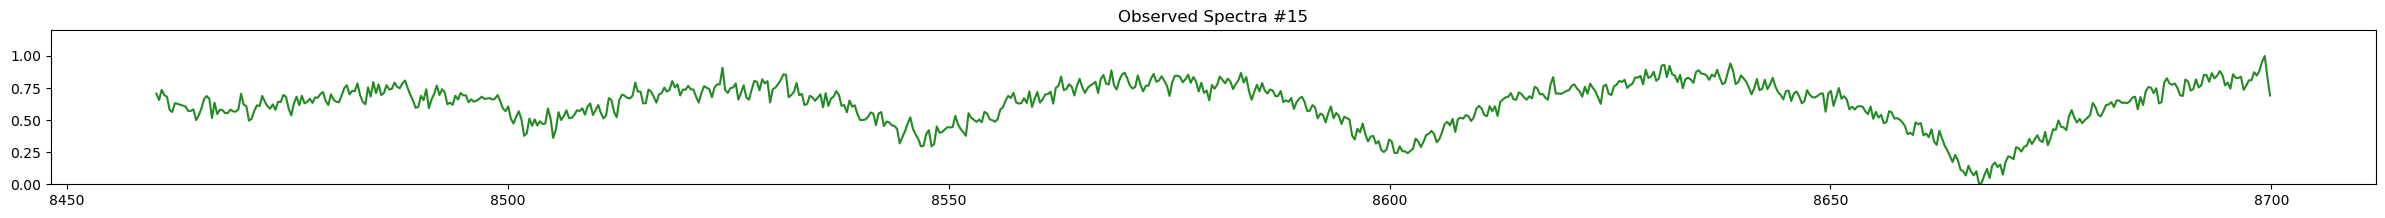

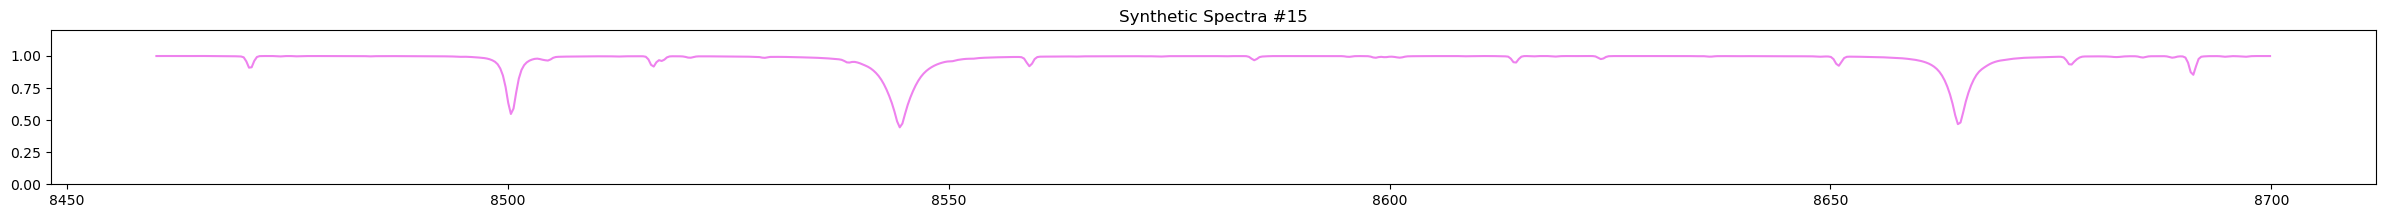

In [5]:
indx = 15

# 867,125 spectra
graph(spectra_obs[indx], obs_color, f'Observed Spectra #{indx}')

# 48,373 spectra
graph(spectra_synth[indx], syn_color, f'Synthetic Spectra #{indx}')

## Hunting for Frequency/Periodicy in Spectra

Some of the observed spectra seem to have a periodic behavior. This section finds some of these periodic, and non periodic, examples.

In [6]:
obs_periodics = [0, 15, 17, 12931, 443260, 144718, 144720, 499952, 499961] #periodic behavior in observed spectra
obs_linears = [11, 19, 12934, 443273] #examples of "normal" and strange linear behavior in observed spectra

syn_periodics = [111, 1811, 33679, 3550, 35248, 3559, 39548] #periodic behavior in synthetic spectra
syn_linears = [26625, 40254, 6607, 4156] #examples of "normal" and strange linear behavior in synthetic spectra

'''
random.seed(111)
for j in range(10):
    randInt = random.randint(0, len(spectra_synth))
    indexes = range(randInt, randInt+11)
    for i in indexes:
        plt.figure(figsize=(30,2))
        plt.plot(wave_grid, spectra_synth[i], color=obs_color)
        plt.ylim(0, 1.2)
        plt.title(f'Synthetic Spectra #{i}')
        plt.show()
        print(i)
'''

"\nrandom.seed(111)\nfor j in range(10):\n    randInt = random.randint(0, len(spectra_synth))\n    indexes = range(randInt, randInt+11)\n    for i in indexes:\n        plt.figure(figsize=(30,2))\n        plt.plot(wave_grid, spectra_synth[i], color=obs_color)\n        plt.ylim(0, 1.2)\n        plt.title(f'Synthetic Spectra #{i}')\n        plt.show()\n        print(i)\n"

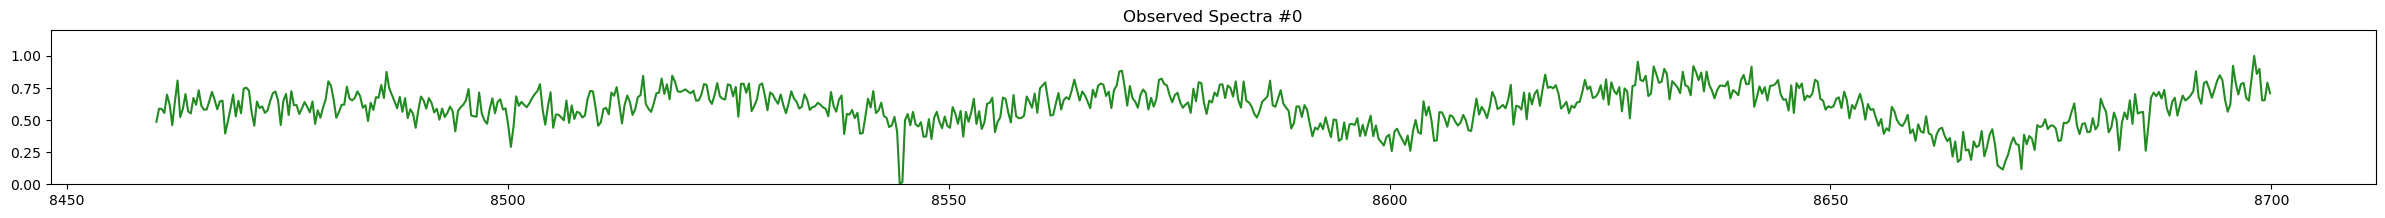

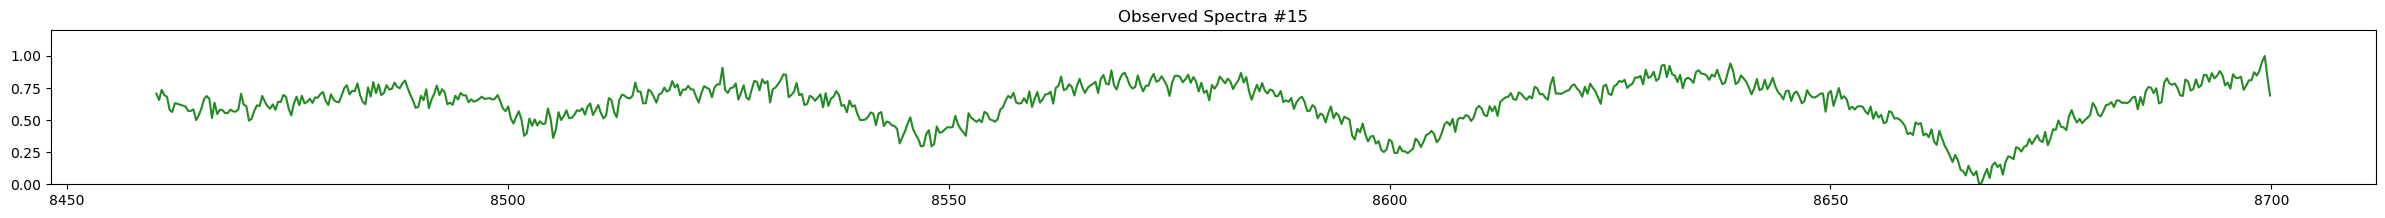

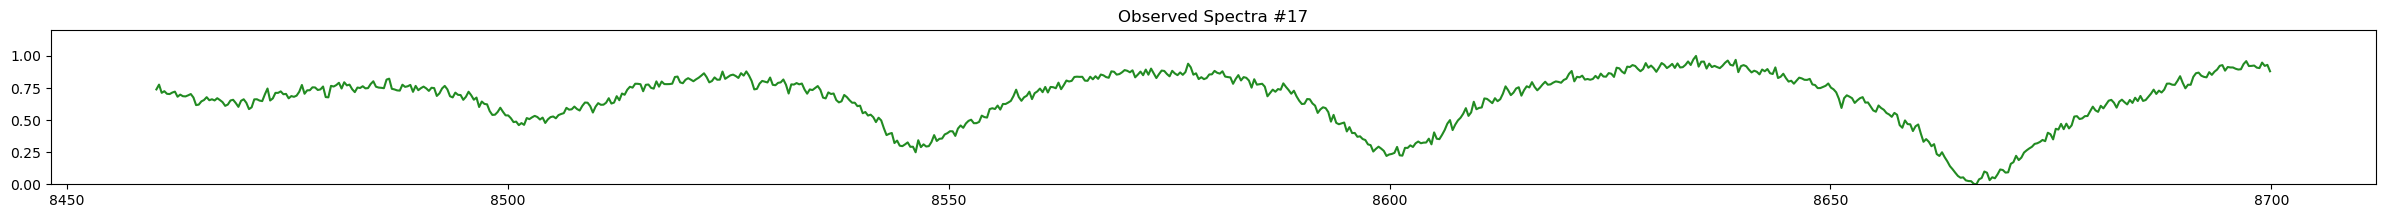

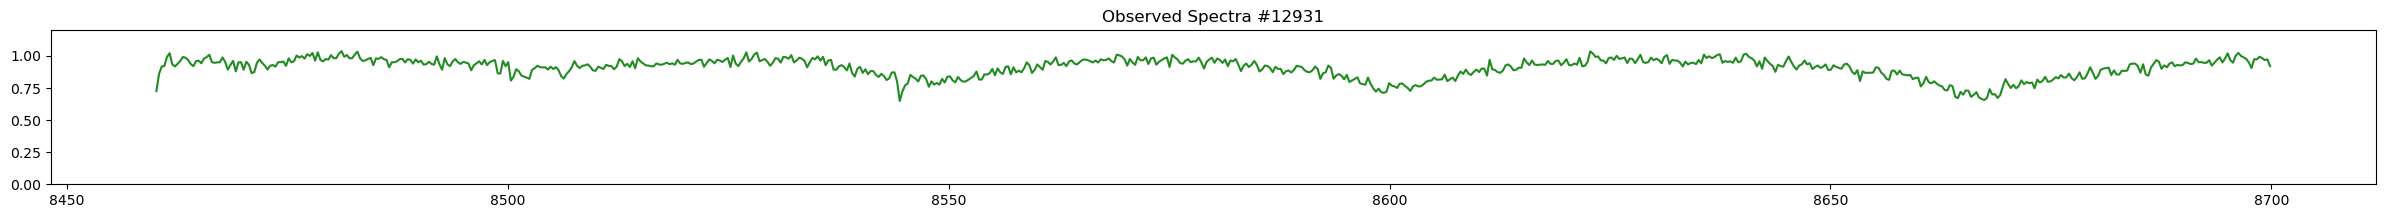

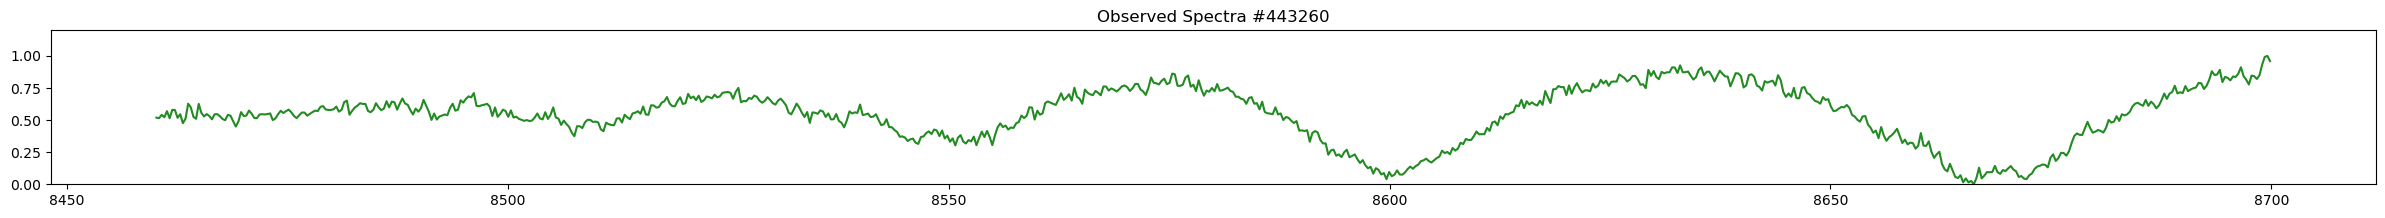

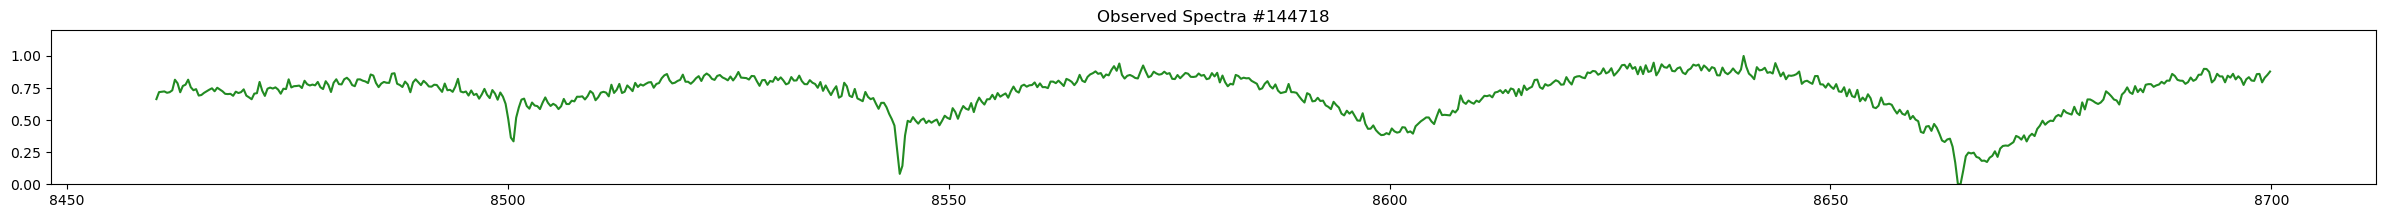

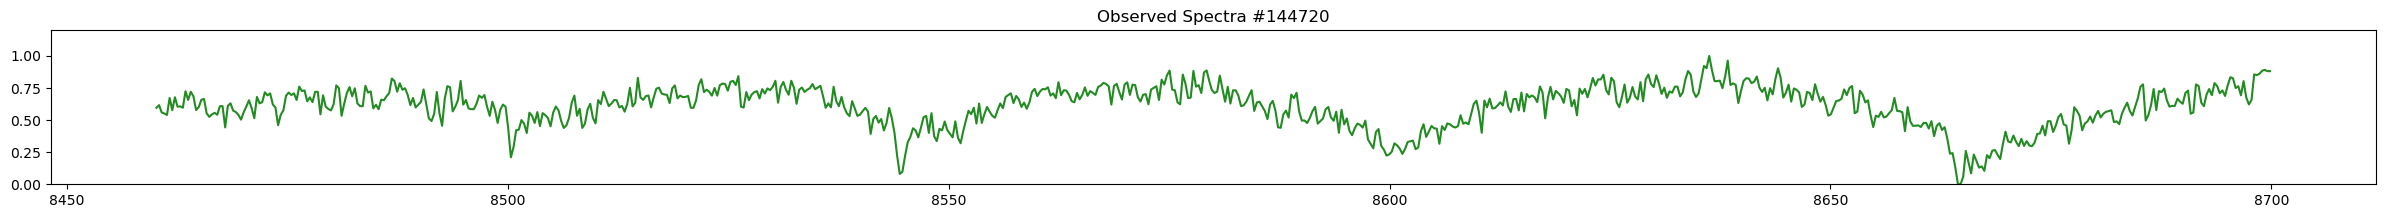

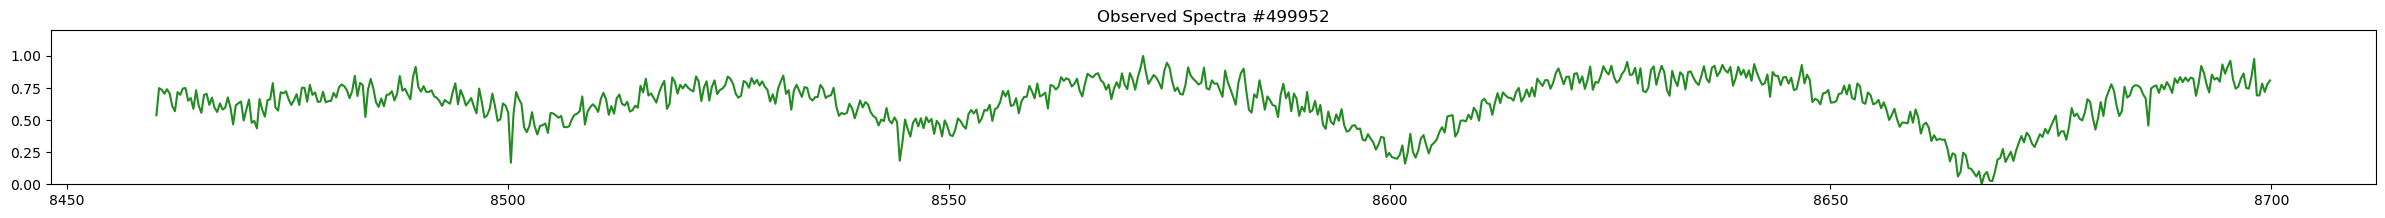

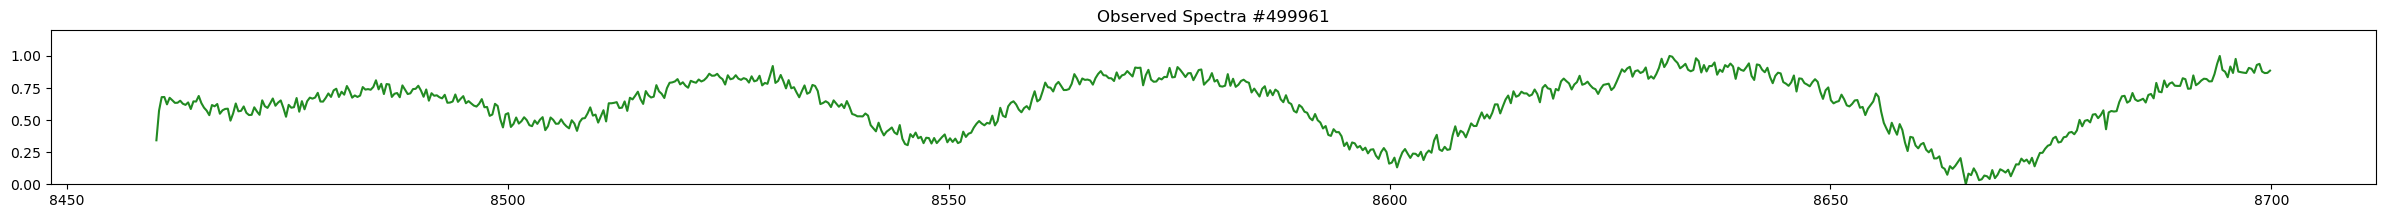

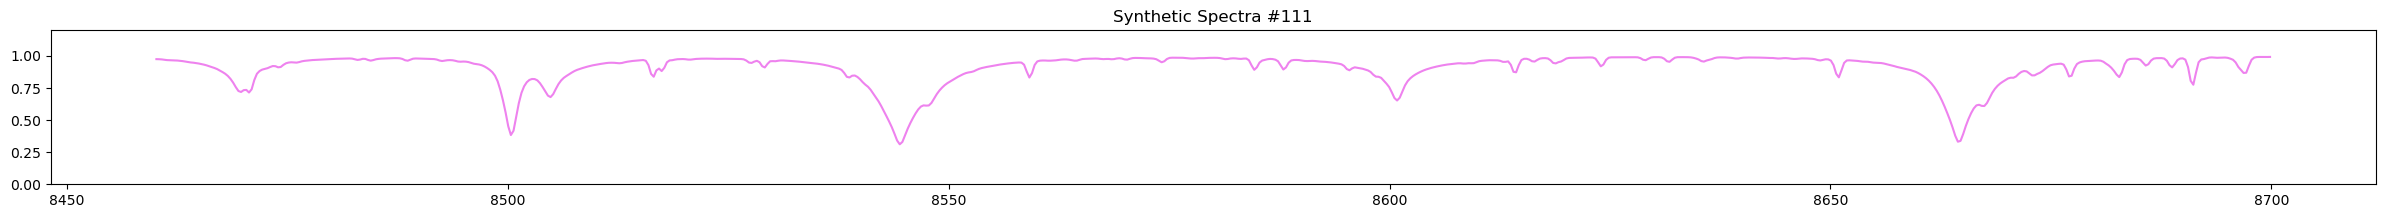

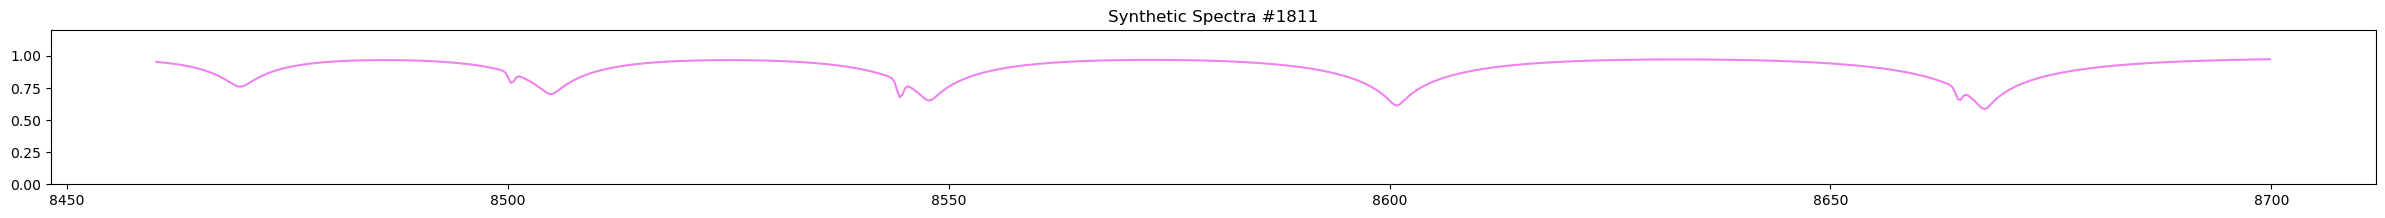

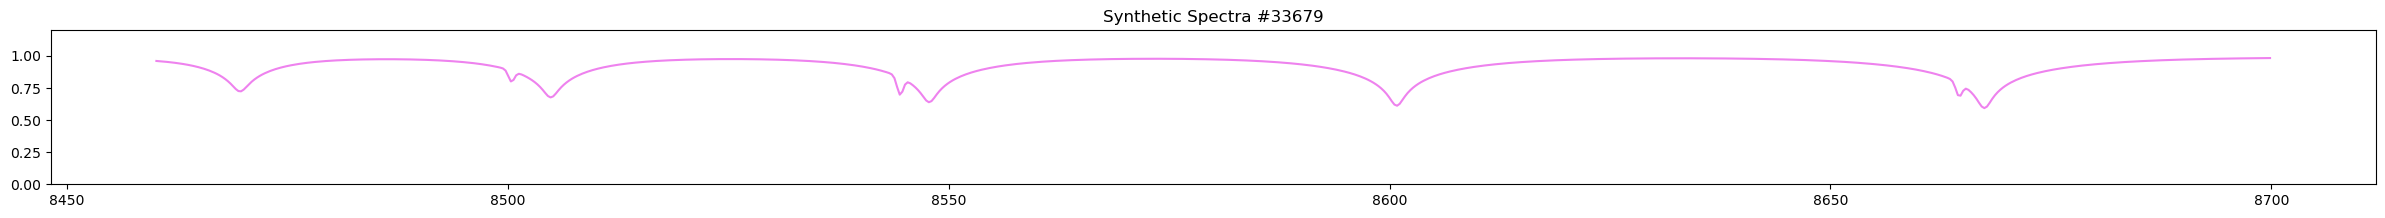

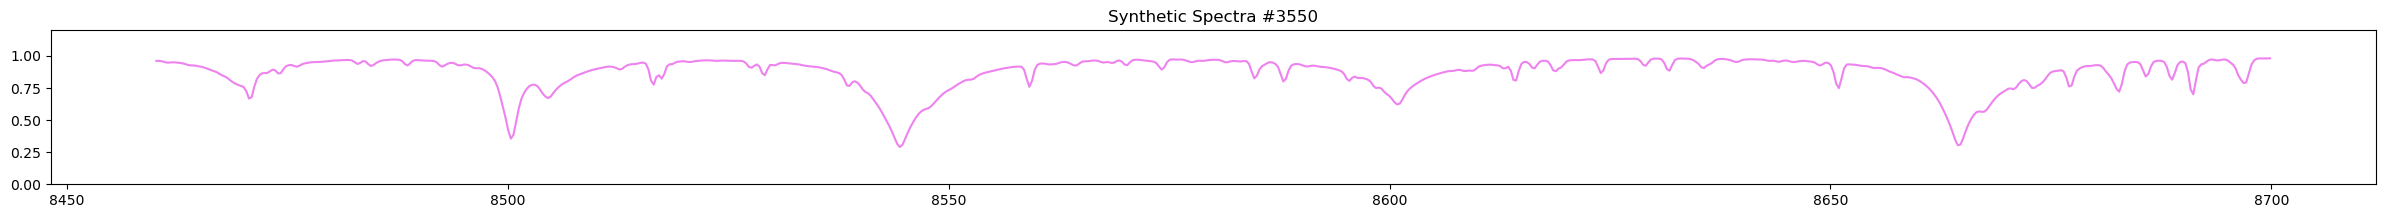

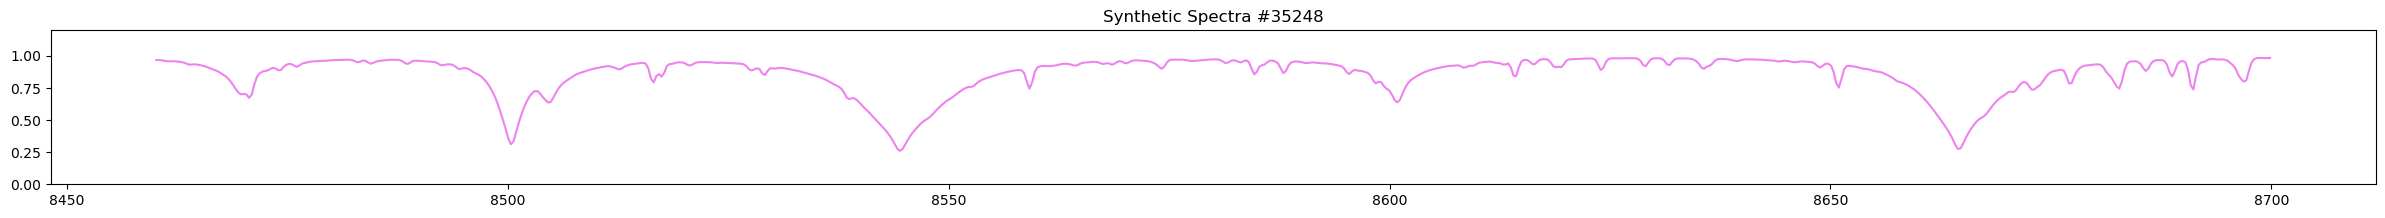

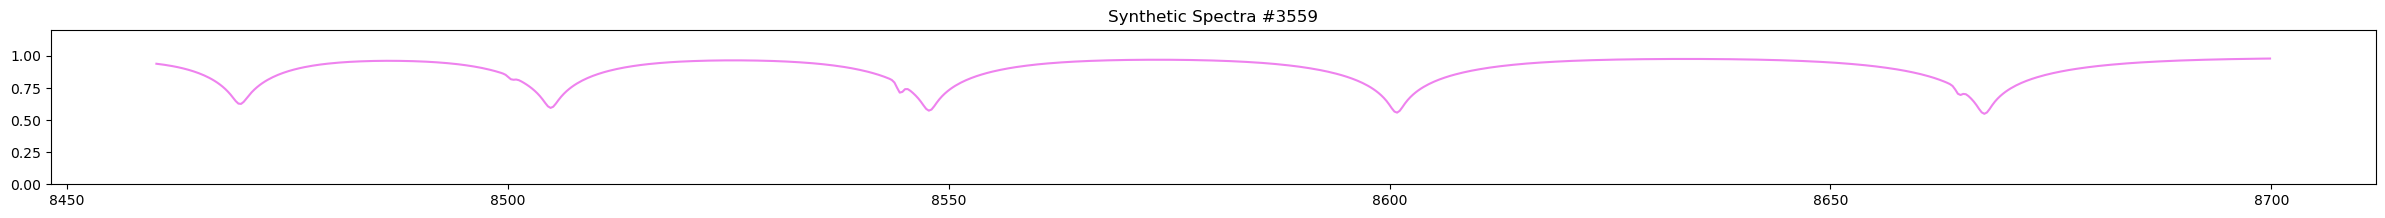

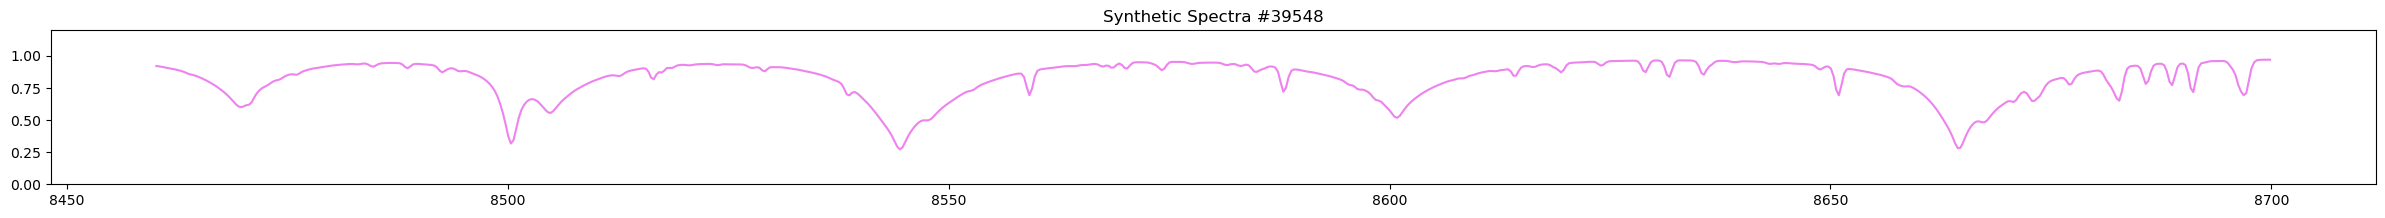

In [7]:
for p in obs_periodics:
    graph(spectra_obs[p], obs_color, f'Observed Spectra #{p}')
    
for p in syn_periodics:
    graph(spectra_synth[p], syn_color, f'Synthetic Spectra #{p}')

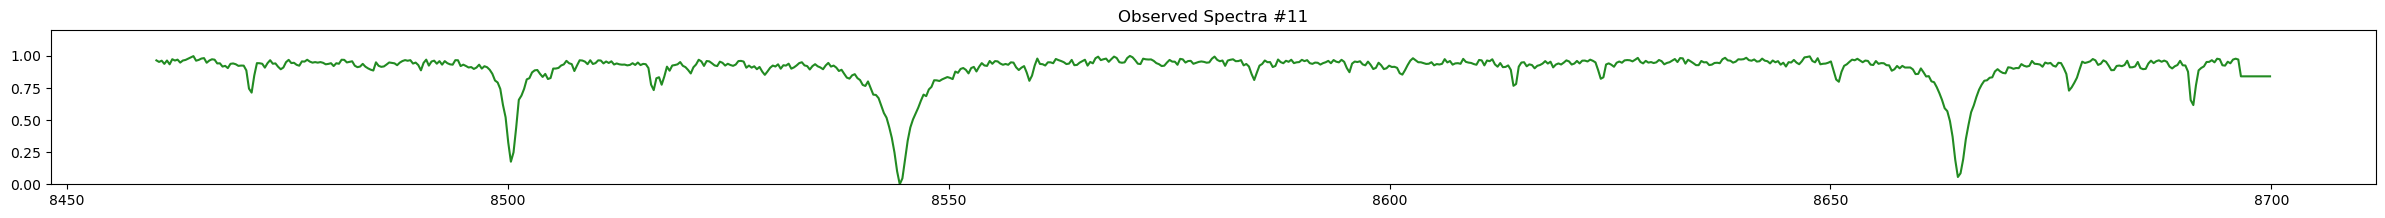

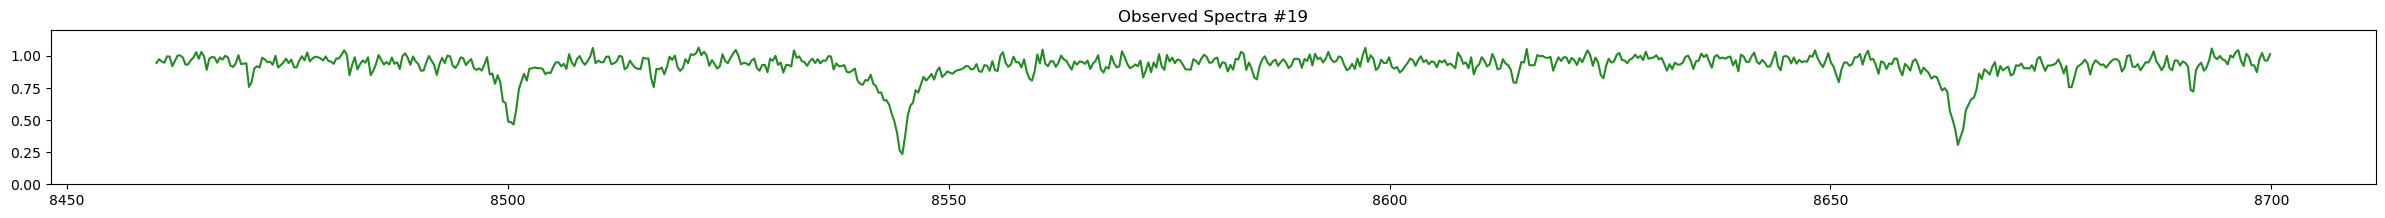

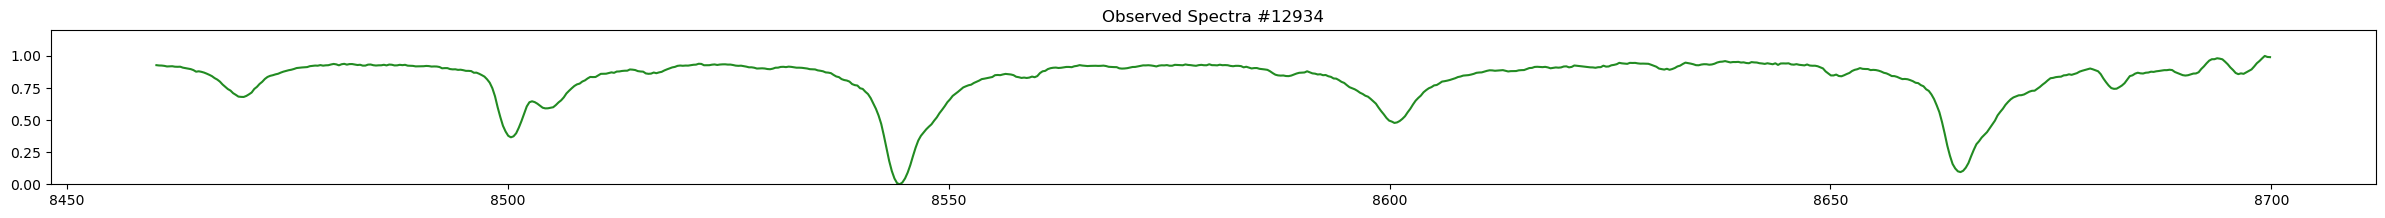

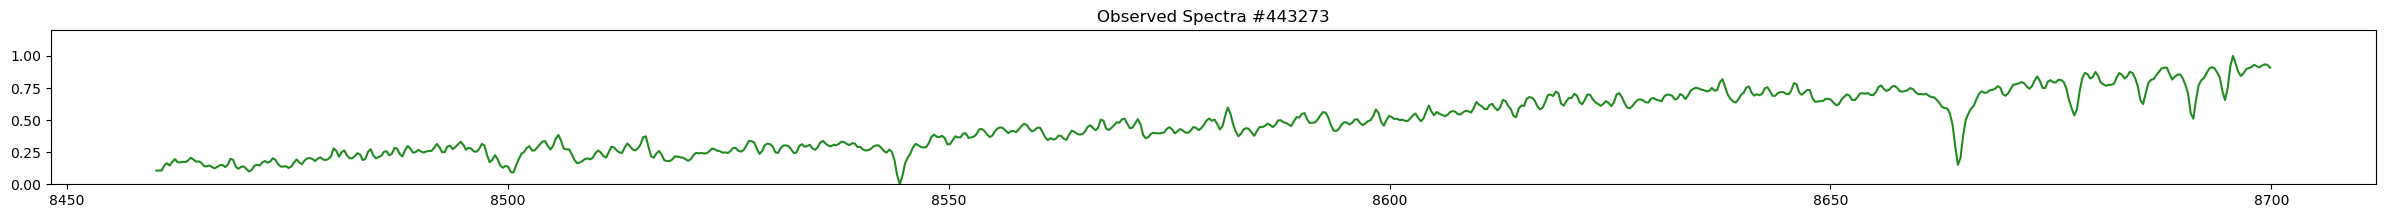

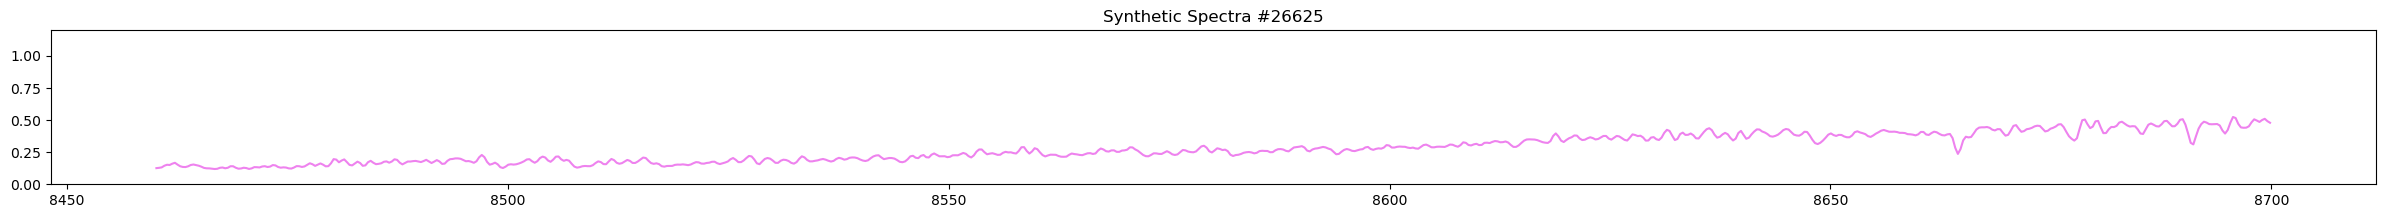

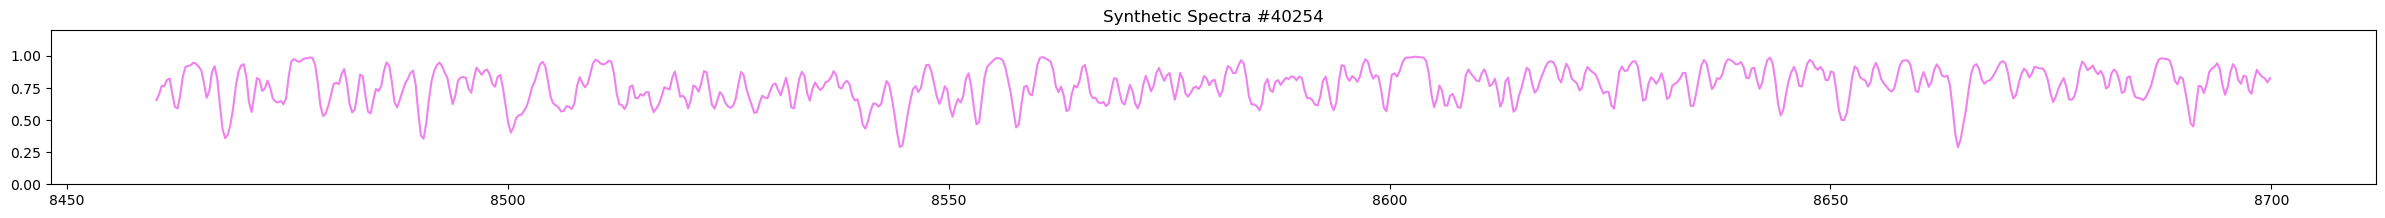

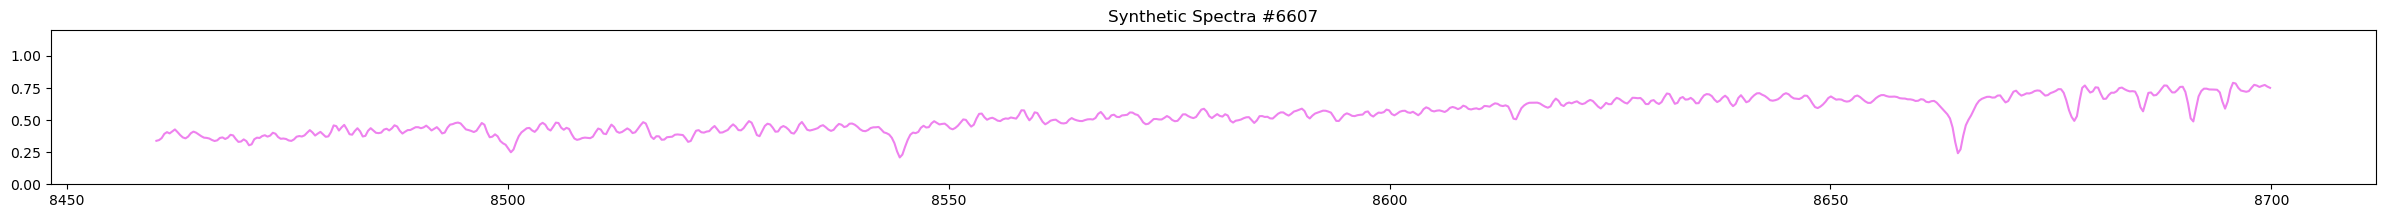

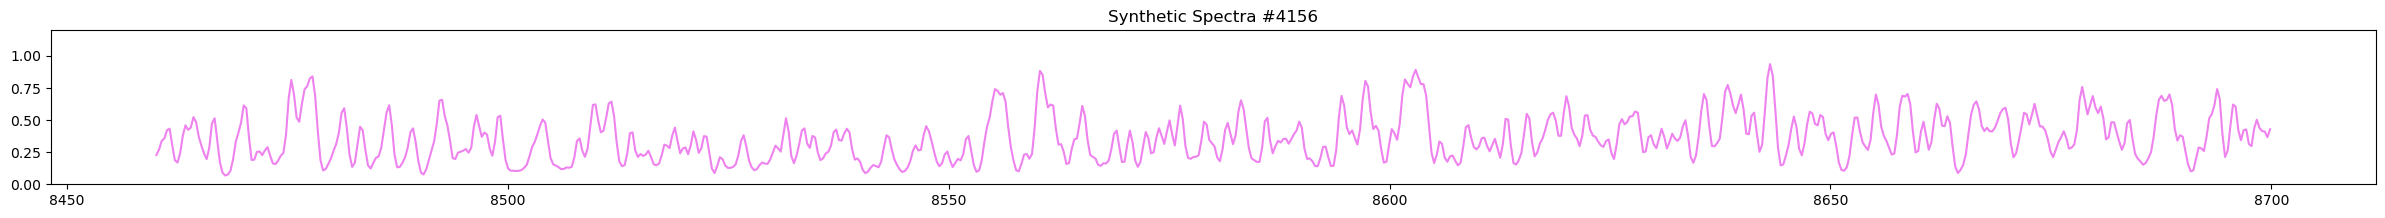

In [8]:
for p in obs_linears:
    graph(spectra_obs[p], obs_color,f'Observed Spectra #{p}')
    
for p in syn_linears:
    graph(spectra_synth[p], syn_color,f'Synthetic Spectra #{p}')

## Hand Labelling Synthetic and Observed Spectra

Labelling by hand. Look at random spectra of each type, record any I think of as "sinusoidal", and the rest as "linear". Use this to try to determine some relationships.

In [9]:
num_to_label = 100

random.seed(874)
indexes = list(range(len(spectra_synth) + 1))
random.shuffle(indexes)
syn_indexes = indexes[:num_to_label]

for i in syn_indexes:
    '''
    print(spectra_synth[i], syn_color, f'Synthetic Spectra #{i}')
    print(i)
    '''
    
random.seed(874)
indexes = list(range(len(spectra_obs) + 1))
random.shuffle(indexes)
obs_indexes = indexes[:num_to_label]

for i in obs_indexes:
    '''
    print(spectra_obs[i], obs_color, f'Observed Spectra #{i}')
    print(i)
    '''

In [10]:
#Results:
syn_SIN = [17467, 32463, 8867, 41466, 34739, 42562, 18659, 39206, 32262, 41269, 27462, 45806]
obs_SIN = [322945, 751687, 334070, 221436, 735504, 293144, 85407, 262781, 194423, 814596, 150030]

#Mark the rest as not sinusoidal
syn_LIN = [x for x in syn_indexes if x not in syn_SIN]
obs_LIN = [x for x in obs_indexes if x not in obs_SIN]

assert len(syn_LIN) + len(syn_SIN) == num_to_label, "Two labels must equal the total"
assert len(obs_LIN) + len(obs_SIN) == num_to_label, "Two labels must equal the total"

print(f'Percent of observed sample labelled sinusoidal {100.0 * len(obs_SIN) / num_to_label:.0f}%')
print(f'Percent of synthetic sample labelled sinusoidal {100.0 * len(syn_SIN) / num_to_label:.0f}%')

#Very interesting in the observed stack: 334070

Percent of observed sample labelled sinusoidal 11%
Percent of synthetic sample labelled sinusoidal 12%


In [11]:
#Lets look at labels
sin_color = 'red'
lin_color = 'gray'

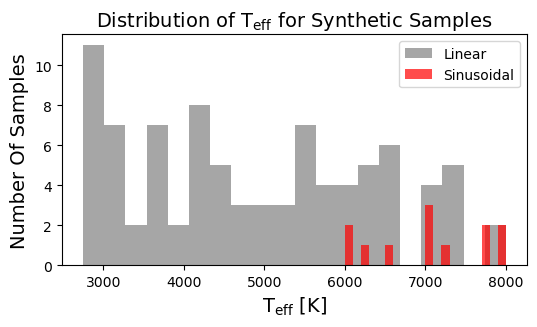

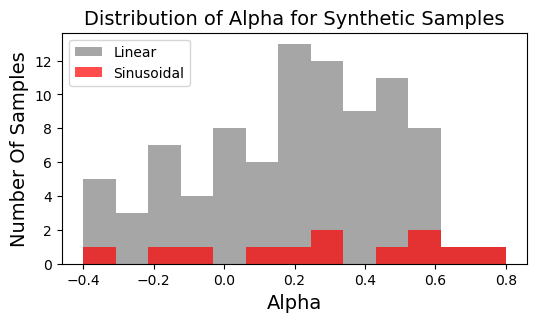

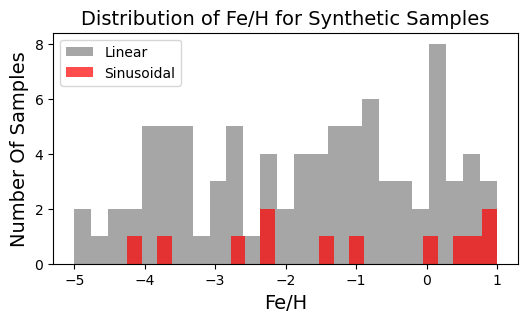

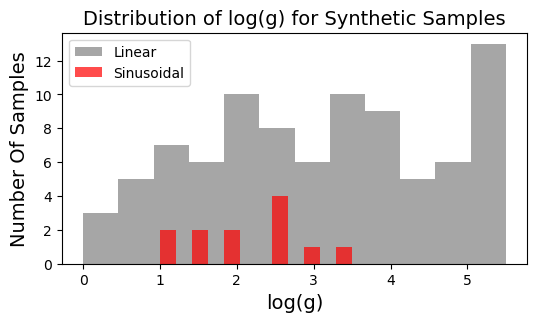

In [12]:
plt.figure(figsize=(6,3))
sin = [teff_synth[i] for i in syn_SIN]
lin = [teff_synth[i] for i in syn_LIN]

#sin = sin[~np.isnan(sin)]
#lin = lin[~np.isnan(lin)]
num_bins = len(set(lin))

plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('T$_{\mathrm{eff}}$ [K]', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of T$_{\mathrm{eff}}$ for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

sin = [alpha_synth[i] for i in syn_SIN]
lin = [alpha_synth[i] for i in syn_LIN]
plt.figure(figsize=(6,3))
num_bins = len(set(lin))
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Alpha for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

sin = [feh_synth[i] for i in syn_SIN]
lin = [feh_synth[i] for i in syn_LIN]
plt.figure(figsize=(6,3))
num_bins = len(set(lin))
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Fe/H', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Fe/H for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

sin = [logg_synth[i] for i in syn_SIN]
lin = [logg_synth[i] for i in syn_LIN]
plt.figure(figsize=(6,3))
num_bins = len(set(lin))
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('log(g)', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of log(g) for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

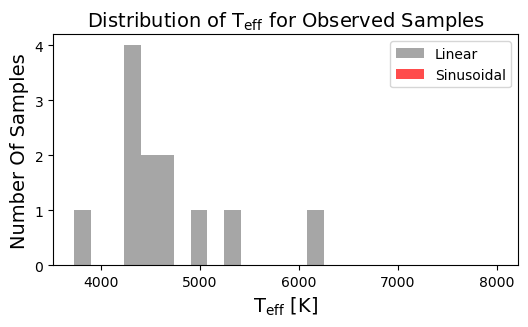

Only 21.6% of observed spectra have a Teff label


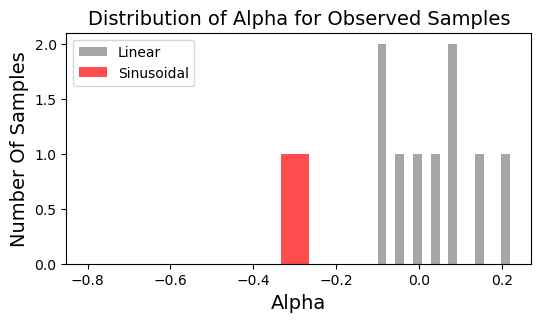

Only 19.6% of observed spectra have an alpha label


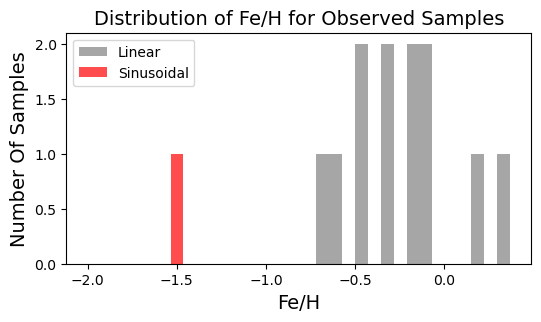

Only 21.4% of observed spectra have a Fe/H label


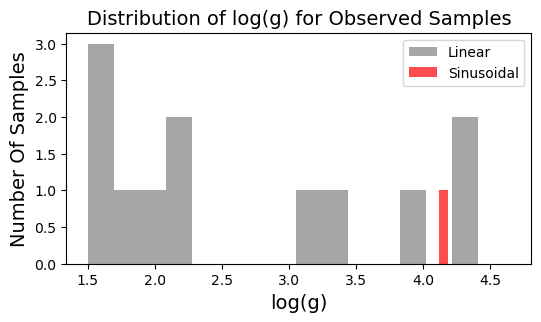

Only 21.6% of observed spectra have a log(g) label


In [13]:
sin = np.array([teff_obs[i] for i in obs_SIN])
lin = np.array([teff_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('T$_{\mathrm{eff}}$ [K]', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of T$_{\mathrm{eff}}$ for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(teff_obs)) / len(teff_obs):.1f}% of observed spectra have a Teff label")

sin = np.array([alpha_obs[i] for i in obs_SIN])
lin = np.array([alpha_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Alpha for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(alpha_obs)) / len(alpha_obs):.1f}% of observed spectra have an alpha label")

sin = np.array([feh_obs[i] for i in obs_SIN])
lin = np.array([feh_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Fe/H', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Fe/H for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(feh_obs)) / len(feh_obs):.1f}% of observed spectra have a Fe/H label")

sin = np.array([logg_obs[i] for i in obs_SIN])
lin = np.array([logg_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('log(g)', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of log(g) for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(logg_obs)) / len(logg_obs):.1f}% of observed spectra have a log(g) label")

## Hand Labelling Synthetic and Observed Spectra, Round 2

Labelling by hand yielded some interesting trends, but I didn't get enough data to be confident in my results. I would like to re-try, limiting my observed data to just spectra with labels and increasing my ammount to 300 spectra of each type. Once again, I will use this to try to determine some relationships.

In [14]:
num_to_label = 300

random.seed(245)
indexes = list(range(len(spectra_synth)))
random.shuffle(indexes)
syn_indexes = indexes[:num_to_label]

for i in syn_indexes:
    '''
    plt.figure(figsize=(30,2))
    plt.plot(wave_grid, spectra_synth[i], color=syn_color)
    plt.ylim(0, 1.2)
    plt.title(f'Synthetic Spectra #{i}')
    plt.show()
    print(i)
    '''
    
random.seed(245)
indexes = list(range(len(spectra_obs)))
# Remove indexes that don't have labels in teff_obs, logg_obs, alpha_obs, feh_obs
valid_indexes = []
for i in indexes:
    if (math.isnan(teff_obs[i]) or math.isnan(logg_obs[i]) or math.isnan(alpha_obs[i]) or math.isnan(feh_obs[i])):
        # Skip adding this index to the list of valid indexes
        continue
    valid_indexes.append(i) 
random.shuffle(valid_indexes)
obs_indexes = valid_indexes[:num_to_label]

for i in obs_indexes:
    '''
    plt.figure(figsize=(30,2))
    plt.plot(wave_grid, spectra_obs[i], color=obs_color)
    plt.ylim(0, 1.2)
    plt.title(f'Observed Spectra #{i}')
    plt.show()
    print(i)
    '''

However, there was a problem! When filtered to be fully clasified stars, only 2 of the 300 obs spectra had any sort of sinusoidal behavior... seems like the spectra with that effect were not previously labelled.

In [15]:
#Results:
syn_SIN = [333,11922,43083,21152,43344,45233,42696,21923,16713,11481,22666,9277,74,31330,5365,13690,9374,43921,9138,28559,41849,45559,15874,42145,31107,22365,6961,23239,2773,29212,26883,23426,3559,43021,23387]
obs_SIN = [386565,1601]

#Mark the rest as not sinusoidal
syn_LIN = [x for x in syn_indexes if x not in syn_SIN]
obs_LIN = [x for x in obs_indexes if x not in obs_SIN]

assert len(syn_LIN) + len(syn_SIN) == num_to_label, "Two labels must equal the total"
assert len(obs_LIN) + len(obs_SIN) == num_to_label, "Two labels must equal the total"

print(f'Percent of observed sample labelled sinusoidal {100.0 * len(obs_SIN) / num_to_label:.0f}%')
print(f'Percent of synthetic sample labelled sinusoidal {100.0 * len(syn_SIN) / num_to_label:.0f}%')

Percent of observed sample labelled sinusoidal 1%
Percent of synthetic sample labelled sinusoidal 12%


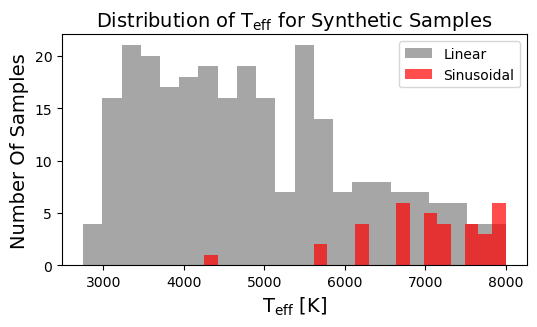

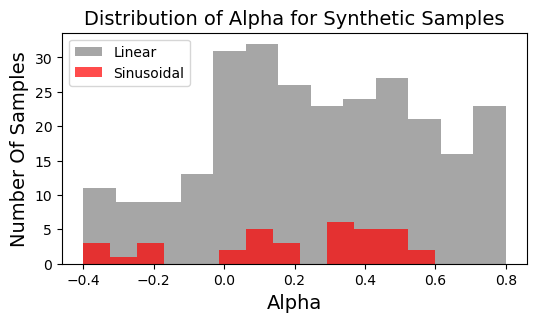

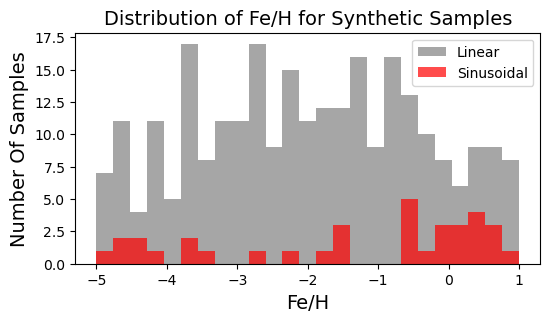

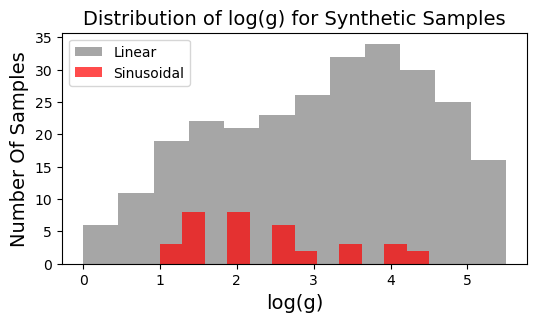

In [16]:
plt.figure(figsize=(6,3))
sin = [teff_synth[i] for i in syn_SIN]
lin = [teff_synth[i] for i in syn_LIN]

#sin = sin[~np.isnan(sin)]
#lin = lin[~np.isnan(lin)]
num_bins = len(set(lin))

plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('T$_{\mathrm{eff}}$ [K]', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of T$_{\mathrm{eff}}$ for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

sin = [alpha_synth[i] for i in syn_SIN]
lin = [alpha_synth[i] for i in syn_LIN]
plt.figure(figsize=(6,3))
num_bins = len(set(lin))
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Alpha for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

sin = [feh_synth[i] for i in syn_SIN]
lin = [feh_synth[i] for i in syn_LIN]
plt.figure(figsize=(6,3))
num_bins = len(set(lin))
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Fe/H', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Fe/H for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

sin = [logg_synth[i] for i in syn_SIN]
lin = [logg_synth[i] for i in syn_LIN]
plt.figure(figsize=(6,3))
num_bins = len(set(lin))
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('log(g)', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of log(g) for Synthetic Samples', fontsize=14)
plt.legend()
plt.show()

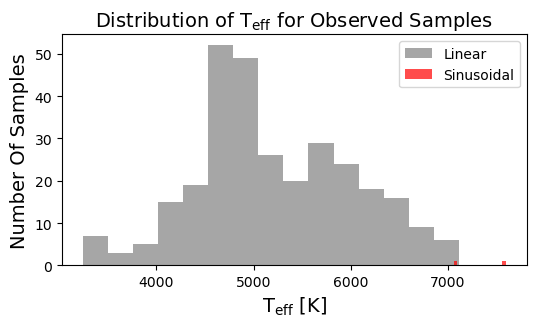

Only 21.6% of observed spectra have a Teff label


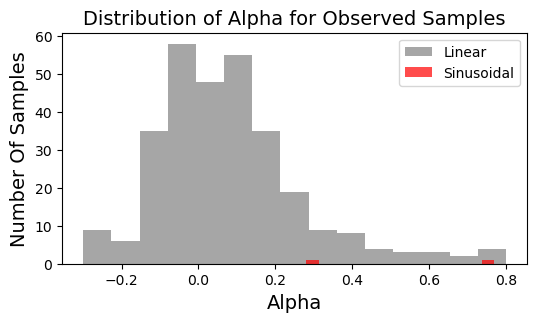

Only 19.6% of observed spectra have an alpha label


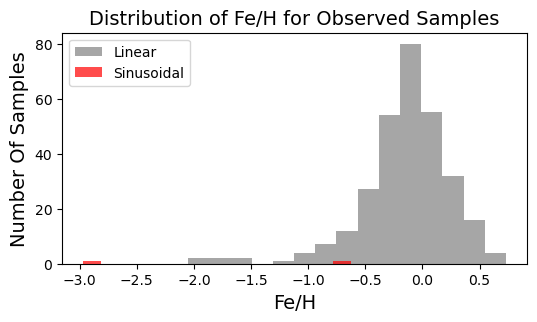

Only 21.4% of observed spectra have a Fe/H label


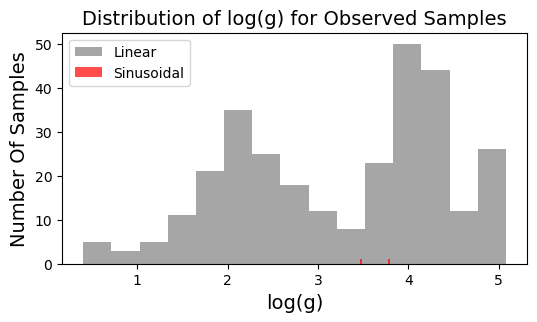

Only 21.6% of observed spectra have a log(g) label


In [17]:
sin = np.array([teff_obs[i] for i in obs_SIN])
lin = np.array([teff_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('T$_{\mathrm{eff}}$ [K]', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of T$_{\mathrm{eff}}$ for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(teff_obs)) / len(teff_obs):.1f}% of observed spectra have a Teff label")

sin = np.array([alpha_obs[i] for i in obs_SIN])
lin = np.array([alpha_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Alpha', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Alpha for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(alpha_obs)) / len(alpha_obs):.1f}% of observed spectra have an alpha label")

sin = np.array([feh_obs[i] for i in obs_SIN])
lin = np.array([feh_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('Fe/H', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of Fe/H for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(feh_obs)) / len(feh_obs):.1f}% of observed spectra have a Fe/H label")

sin = np.array([logg_obs[i] for i in obs_SIN])
lin = np.array([logg_obs[i] for i in obs_LIN])
plt.figure(figsize=(6,3))
sin = sin[~np.isnan(sin)]
lin = lin[~np.isnan(lin)]
num_bins = 15
plt.hist(lin, label='Linear',color=lin_color, alpha=0.7, density=False, bins=num_bins)
plt.hist(sin, label='Sinusoidal',color=sin_color, alpha=0.7, density=False, bins=num_bins)
plt.xlabel('log(g)', fontsize=14)
plt.ylabel('Number Of Samples', fontsize=14)
plt.title('Distribution of log(g) for Observed Samples', fontsize=14)
plt.legend()
plt.show()
print(f"Only {100 * np.count_nonzero(~np.isnan(logg_obs)) / len(logg_obs):.1f}% of observed spectra have a log(g) label")

## Frequency/Periodicy Analysis of a Single Spectra

Some of the observed spectra seem to have a periodic behavior. This section analyzes just one, index 15 in the observed dataset.

In [18]:
indx = 15
spectrum = spectra_obs[indx]

# Compute the FFT of the spectrum
fft_spectrum = np.fft.fft(spectrum)

sampling_rate = (wave_grid[799] - wave_grid[0]) / (800 - 1) # Assuming the spectra are evenly spaced

# Compute the corresponding frequencies
frequencies = np.fft.fftfreq(len(spectrum), d=1/sampling_rate)

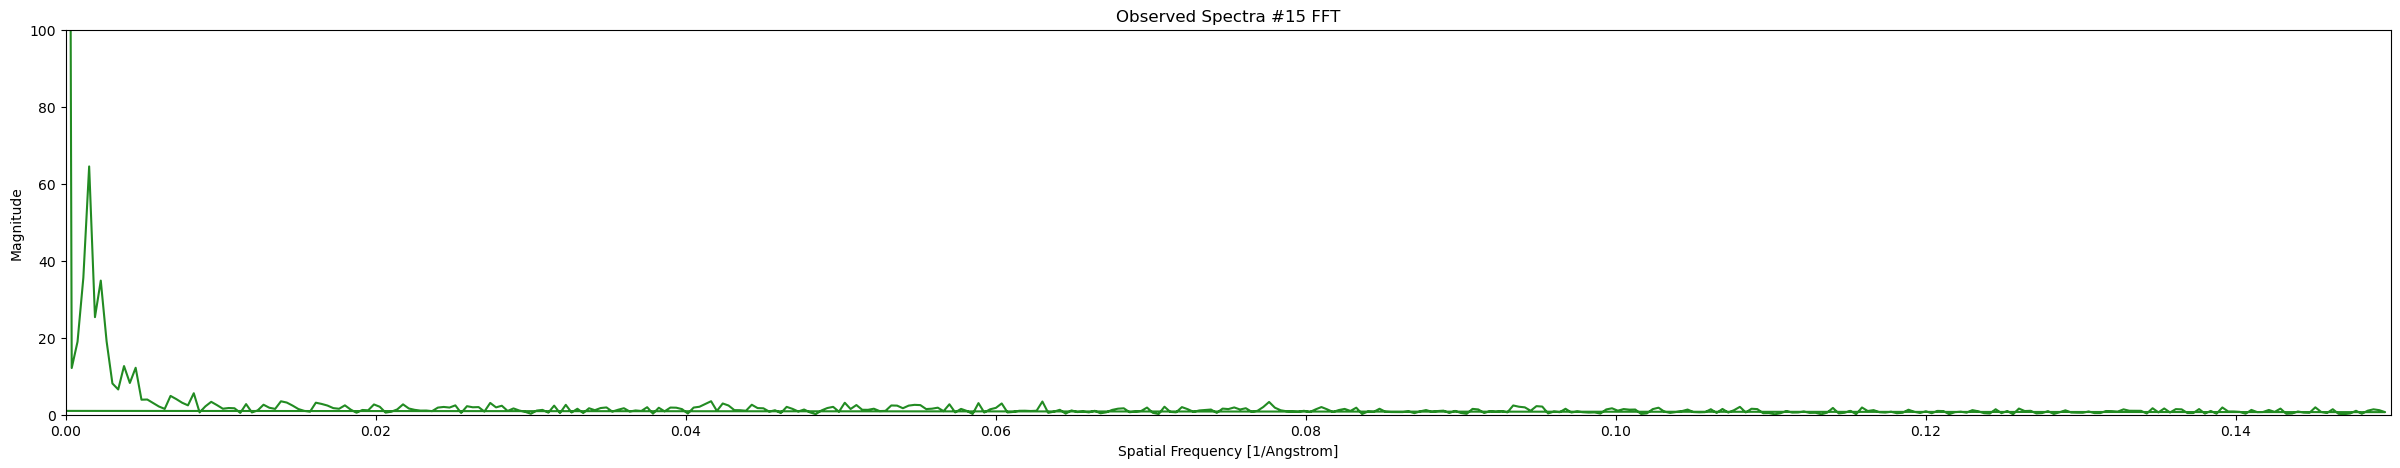

In [19]:
# Plot the magnitude spectrum (magnitude of the FFT)
plt.figure(figsize=(30,5))
plt.plot(frequencies, np.abs(fft_spectrum),color=obs_color)
plt.xlabel('Spatial Frequency [1/Angstrom]')
plt.ylabel('Magnitude')
plt.ylim(0,100)
plt.xlim(0, .15)
plt.title(f'Observed Spectra #{indx} FFT')
plt.show()

In [20]:
# Find frequency with the highest magnitude
positive_frequencies = frequencies[1:]  # Exclude the zero frequency
positive_magnitudes = np.abs(fft_spectrum[1:])  # Exclude the magnitude at the zero frequency
max_magnitude_index = np.argmax(positive_magnitudes)
highest_magnitude_frequency = abs(positive_frequencies[max_magnitude_index])
highest_magnitude_frequency
print('For spectra #%i' % (indx), 
      'the non-zero Spatial Frequency with Highest Magnitude is %0.5f [1/Angstrom].' % (highest_magnitude_frequency))

For spectra #15 the non-zero Spatial Frequency with Highest Magnitude is 0.00150 [1/Angstrom].


ChatGPT prompt:

A spectra is a vector, with 800 pixels, and each pixel has a value between 0 and 1. I have a numpy.ndarray of 867125 spectra. However, I am just looking at one spectra which should be flat with sharp emission bands but has somewhat of a periodic effect to it. I used FFT to find the non-zero Spatial Frequency with Highest Magnitude. I would like to generate a new spectra, 800 pixels long, with values between 0 and 1, that can be sinusoidal with that frequency and a tuneable magnitude, x and y offset, and plot it over the periodic spectra I found to see if they line up somewhat.

When writing code, please focus on the new content and do not worry about import statements, etc.

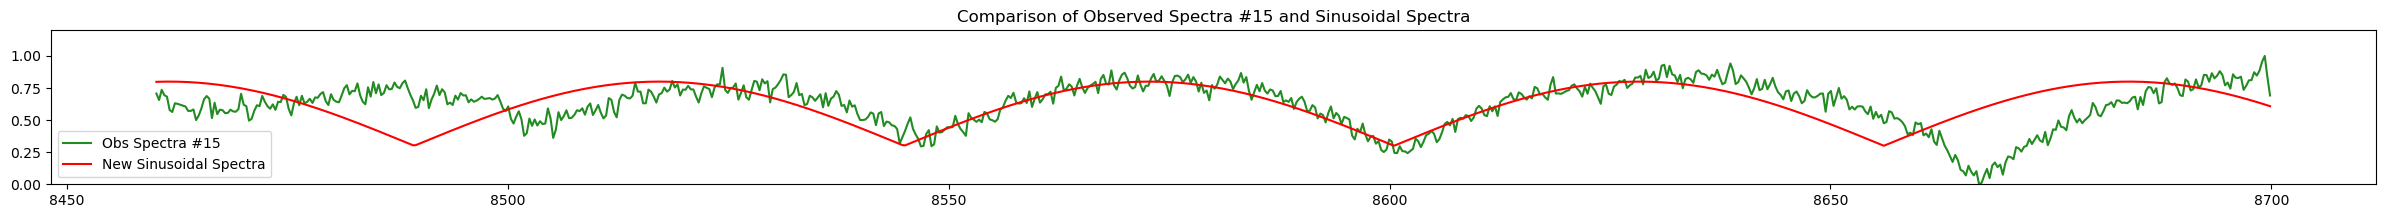

In [21]:
# Plot sin wave with that frequency


# Define parameters for the new spectra
x = np.linspace(wave_grid[0], wave_grid[-1], len(wave_grid)) 
magnitude = 0.5  # Tuneable magnitude
x_offset = 0.6 # Tuneable x offset
y_offset = 0.3  # Tuneable y offset
freq = 0.009



# Generate the new spectra with sinusoidal pattern
new_spectra = magnitude * abs(np.sin(2 * np.pi * freq * x + x_offset)) + y_offset

# Plotting the original periodic spectra and the new sinusoidal spectra
plt.figure(figsize=(30,2))
plt.plot(wave_grid, spectra_obs[indx], color=obs_color, label='Obs Spectra #15')
plt.plot(wave_grid, new_spectra, color='red', label='New Sinusoidal Spectra')
plt.ylim(0, 1.2)
plt.title(f'Comparison of Observed Spectra #{indx} and Sinusoidal Spectra')
plt.legend()
plt.show()

## t-SNEs and Augmentations
My goal is to try to add some of that periodic and noise behavior I observed in the observed spectra to the synthetic data to make them more similar.

ChatGPT prompt:

A spectra is a vector, with 800 pixels, and each pixel has a value between 0 and 1. I have a numpy.ndarray of more than 800,000 observed spectra and another numpy.dnarray of more than 40,000 synthetic spectra. However, some of the observed spectra have noise and somewhat of a periodic effect. In theory, spectra should be flat with sharp emission bands, and that is what the synthetic spectra look like. I would like to augment the synthetic spectra to look more like the observed spectra through two ways: adding small gaussian noise, and adding sinusoidal-type modifications. I want the noise and augmentations to be unique to each spectra and to be tweakeable. My current idea is to write a function that adds noise and a function that adds sinusoidal behavior, a function which has tweakable parameters and random behavior. Then, I would apply this function to all the synthetic spectra. Does this seem like a good idea? If so, could you create a first draft of those two functions?

When writing code, please focus on the new content and do not worry about import statements, etc.

In [22]:
def add_gaussian_noise(spectra, mean=0, std=0.07):
    """
    Add Gaussian noise to the spectra.

    Args:
        spectra (numpy.ndarray): Array of spectra.
        mean (float): Mean of the Gaussian noise. Default is 0.
        std (float): Standard deviation of the Gaussian noise. Default is 0.07.

    Returns:
        numpy.ndarray: Spectra with added Gaussian noise.
    """
    noise = np.random.normal(mean, std, size=spectra.shape)
    augmented_spectra = spectra + noise
    return augmented_spectra


def add_sinusoidal_modifications(spectra, wavegrid=wave_grid, frequency_range=(0.008, 0.012), magnitude_range=(0.1, 0.25), prob=1.0):
    """
    Add sinusoidal modifications to the spectra.

    Args:
        spectra (numpy.ndarray): Array of spectra.
        frequency_range (tuple): Range of frequencies for the sinusoidal modifications.
                                Default is (0.05, 0.1).
        magnitude_range (tuple): Range of magnitudes for the sinusoidal modifications.
                                Default is (0.1, 0.25).
        prob (float): Probability to apply noise to each spectra

    Returns:
        numpy.ndarray: Spectra with added sinusoidal modifications.
    """
    
    augmented_spectra = np.copy(spectra)

    for i in range(len(spectra)):
        # check if this spectra gets noise
        if random.random() <= prob:
            frequency = random.uniform(frequency_range[0], frequency_range[1])
            magnitude = random.uniform(magnitude_range[0], magnitude_range[1])
            x_offset = random.uniform(-0.5, 0.5)
            y_offset = random.uniform(-0.3, -0.2)

            x = np.linspace(wavegrid[0], wavegrid[-1], len(wavegrid)) 
            modification = magnitude * abs(np.sin(2 * np.pi * frequency * x + x_offset)) + y_offset
            augmented_spectra[i] = augmented_spectra[i] + modification

    return augmented_spectra

In [23]:
from sklearn.manifold import TSNE

def run_tsne(data_a, data_b, perplex):

    m = len(data_a)

    # Combine data into a single array
    t_data = np.row_stack((data_a,data_b))

    # Convert data to float64 matrix. float64 is need for bh_sne
    t_data = np.asarray(t_data).astype('float64')
    t_data = t_data.reshape((t_data.shape[0], -1))

    # Run t-SNE    
    vis_data = TSNE(n_components=2, perplexity=perplex).fit_transform(t_data)
    
    # Separate 2D into x and y axes information
    vis_x_a = vis_data[:m, 0]
    vis_y_a = vis_data[:m, 1]
    vis_x_b = vis_data[m:, 0]
    vis_y_b = vis_data[m:, 1]
    
    return vis_x_a, vis_y_a, vis_x_b, vis_y_b

Extract a sub-sample of synthetic and observed spectra

In [24]:
num_samples = 1000
random.seed(12)
np.random.seed(12)

syn_indx = list(range(len(spectra_synth)))
obs_indx = list(range(len(spectra_obs)))
random.shuffle(syn_indx)
random.shuffle(obs_indx)
syn_indx = syn_indx[:num_samples]
obs_indx = obs_indx[:num_samples]

spectra_synth_sample = np.zeros((len(syn_indx), len(wave_grid)))
spectra_obs_sample = np.zeros((len(obs_indx), len(wave_grid)))
teff_samples = np.zeros(len(obs_indx))

for i in range(len(syn_indx)):
    indx = syn_indx[i]
    spectra_synth_sample[i] = spectra_synth[indx]
    teff_samples[i] = teff_synth[indx]
    
for i in range(len(obs_indx)):
    indx = obs_indx[i]
    spectra_obs_sample[i] = spectra_obs[indx]





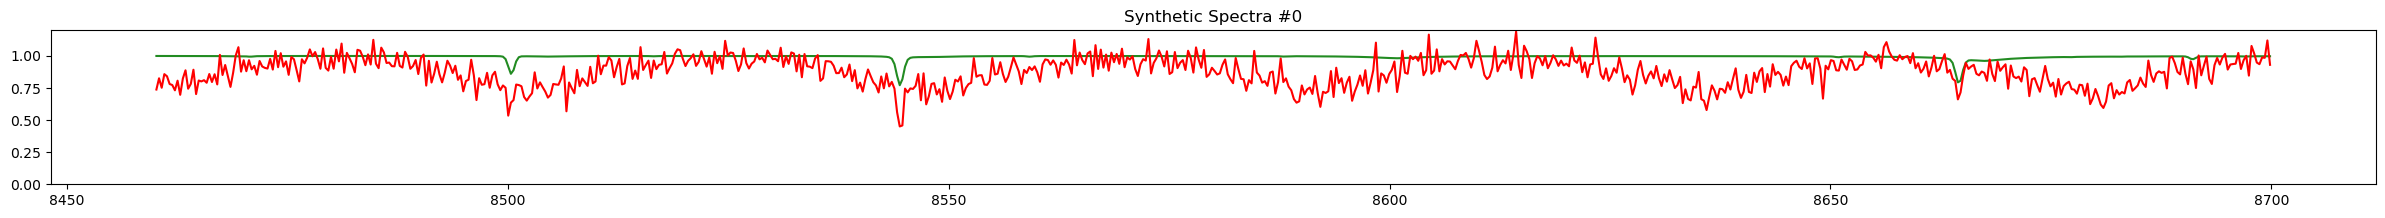

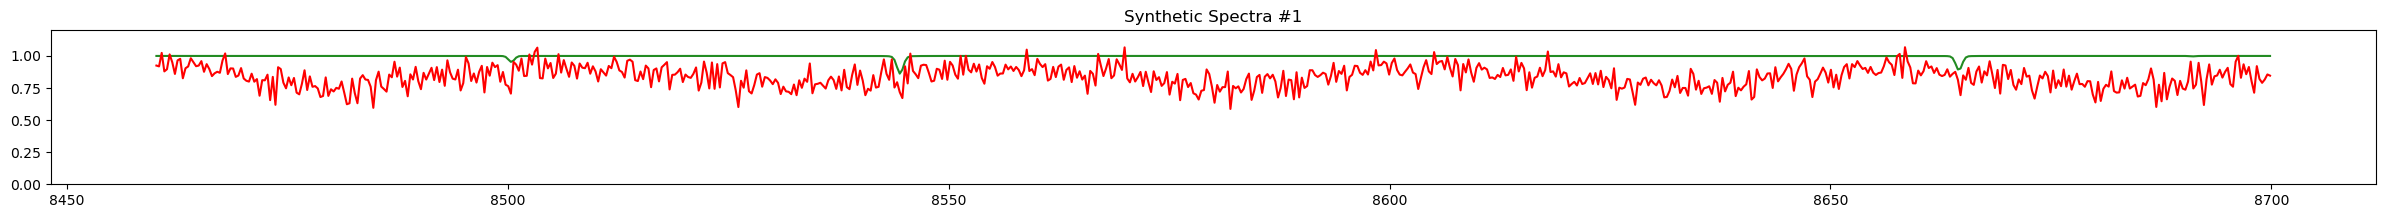

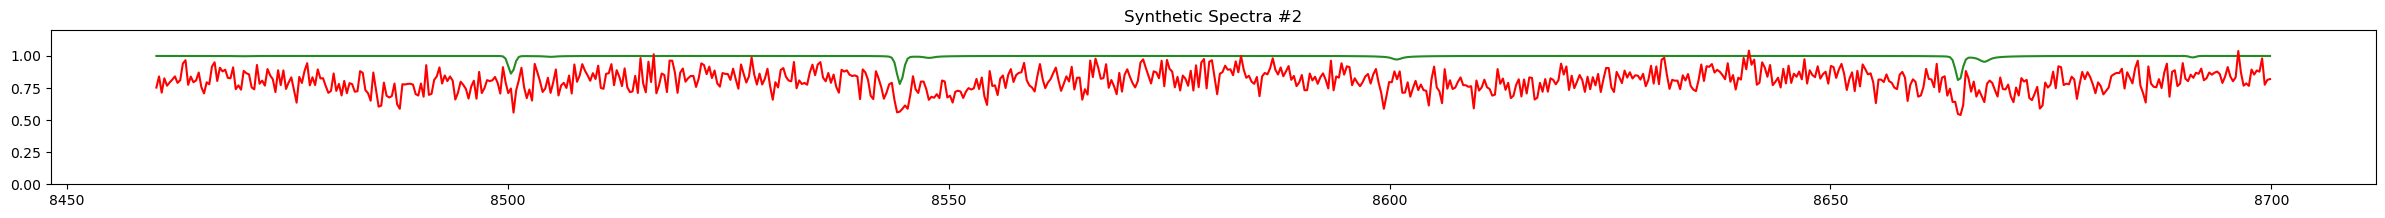

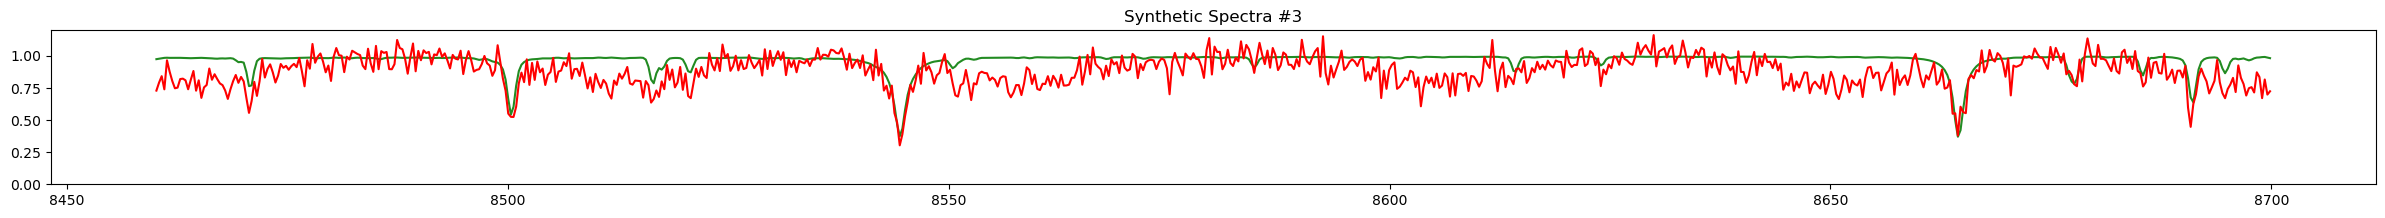

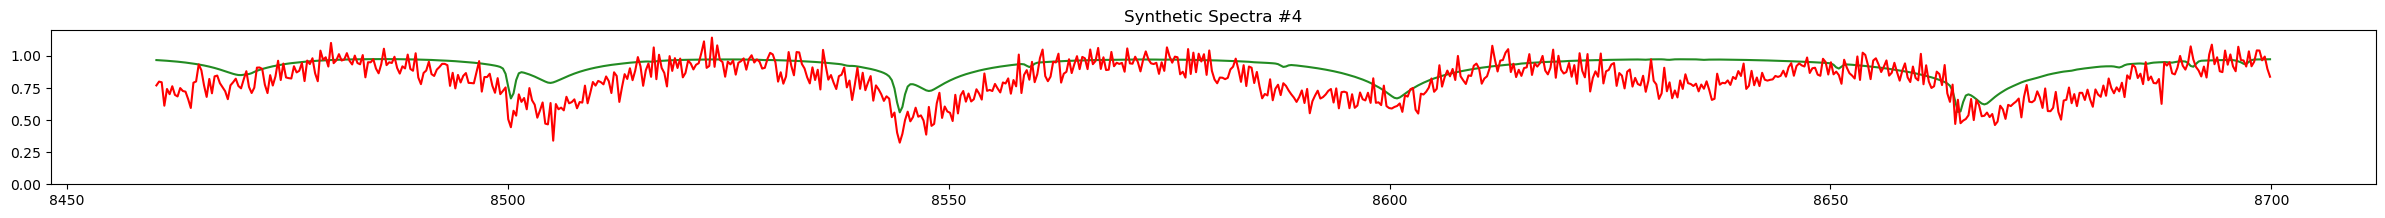

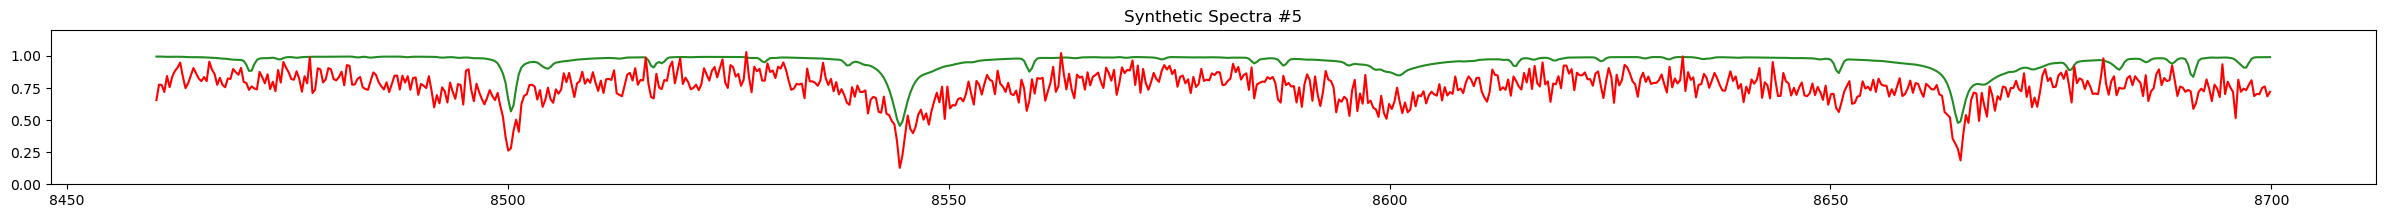

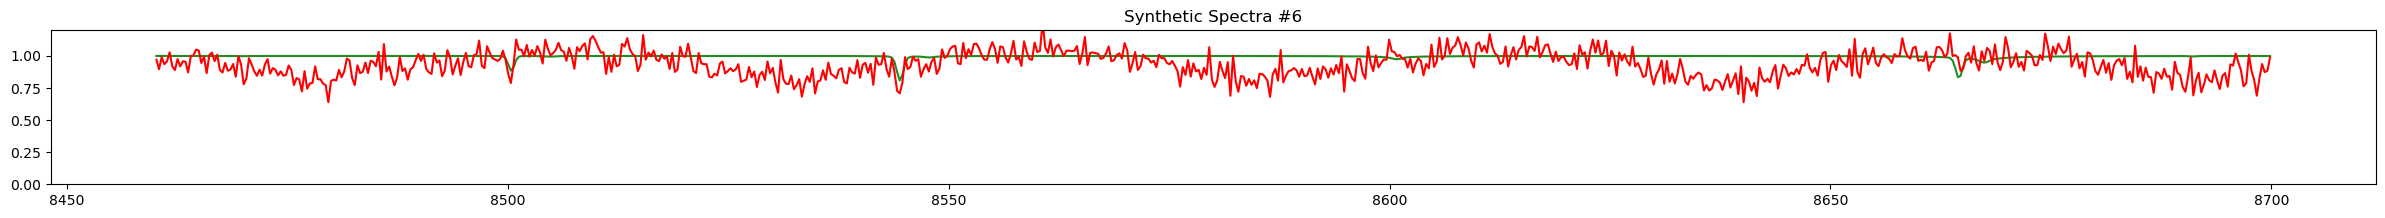

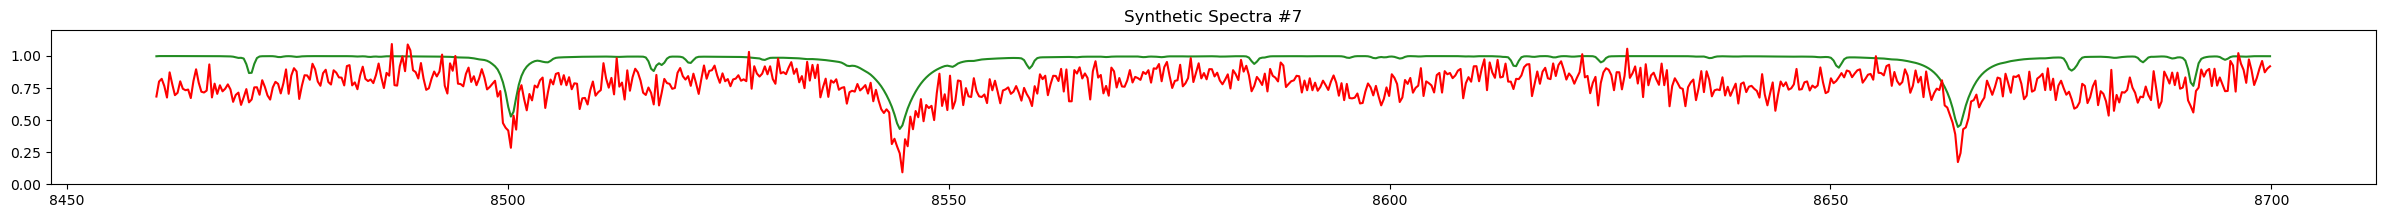

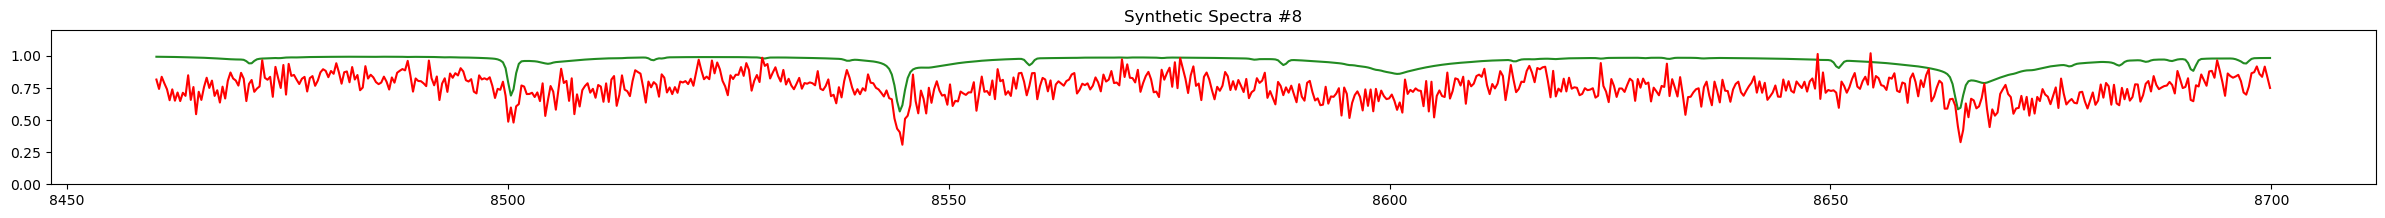

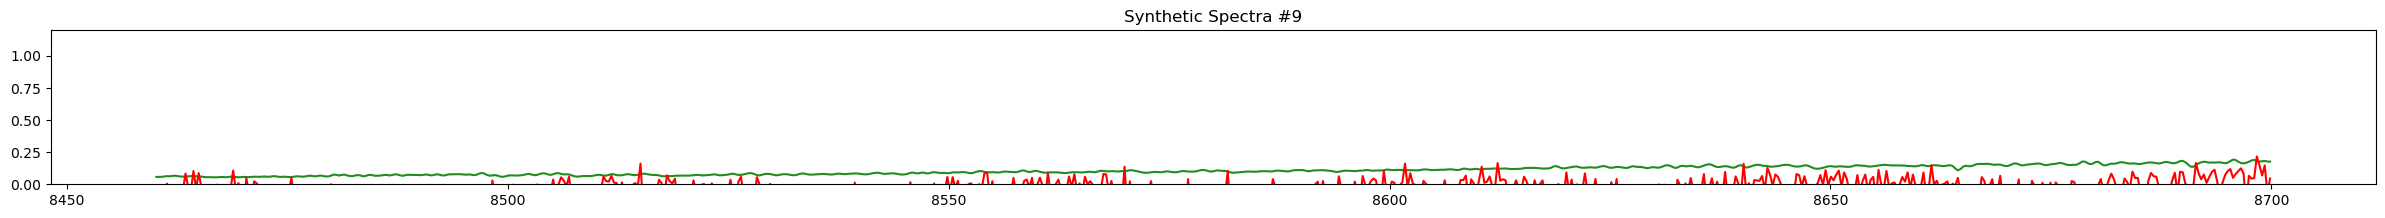

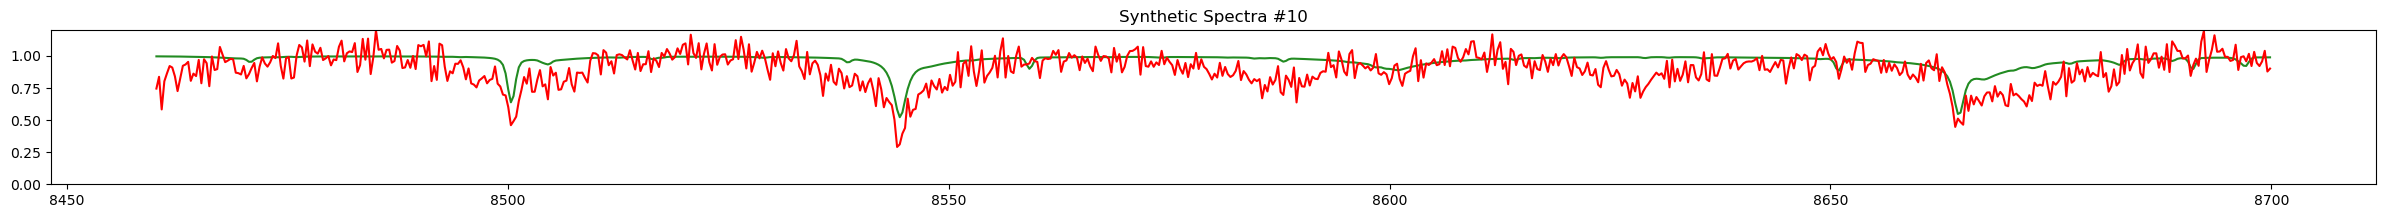

In [25]:
# Create augmented versions
spectra_synth_sample_NOISED = add_gaussian_noise(spectra_synth_sample, mean=0, std=0.07)
spectra_synth_sample_PERIODIC = add_sinusoidal_modifications(spectra_synth_sample)
spectra_synth_sample_BOTH = add_gaussian_noise(spectra_synth_sample_PERIODIC)



for i in range(0, 11):
    plt.figure(figsize=(30,2))
    plt.plot(wave_grid, spectra_synth_sample[i], color=obs_color)
    plt.plot(wave_grid, spectra_synth_sample_BOTH[i], color='red')
    plt.ylim(0, 1.2)
    plt.title(f'Synthetic Spectra #{i}')
    plt.show()

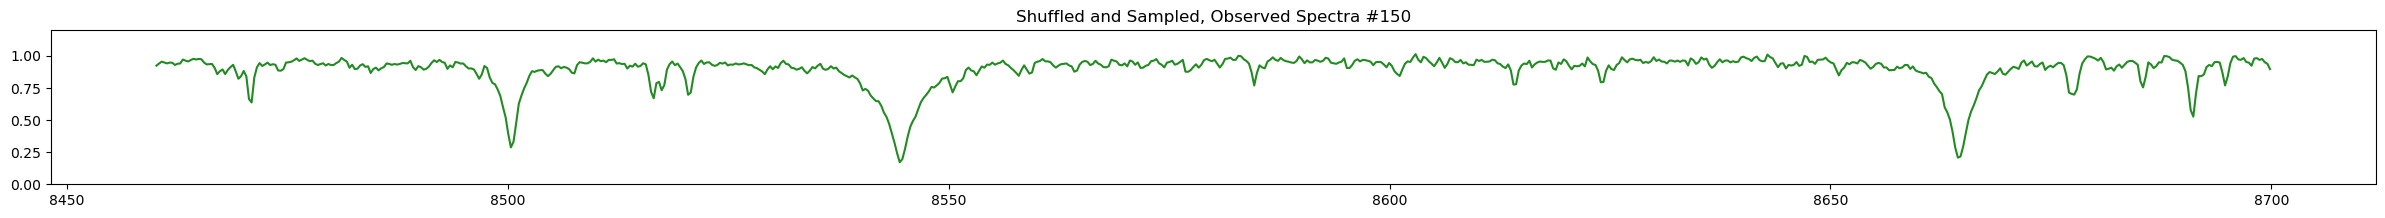

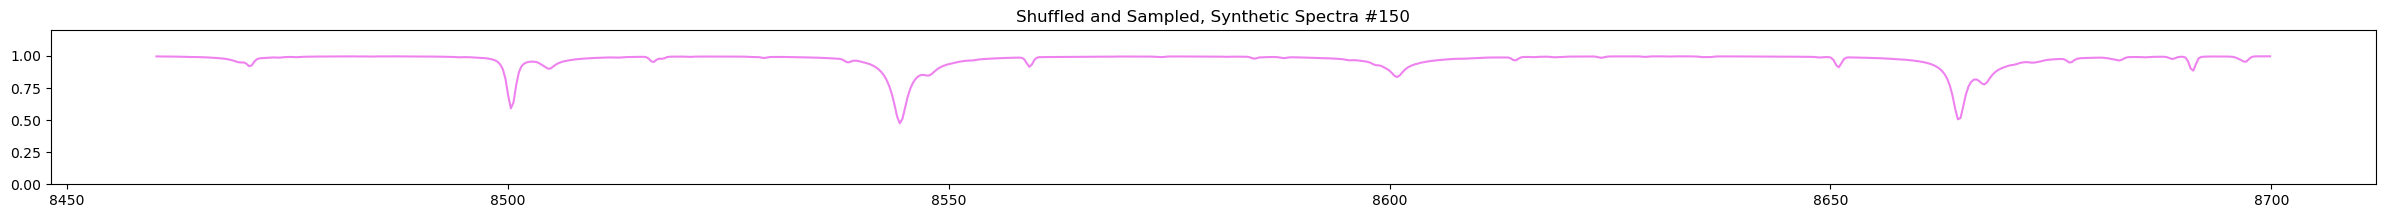

In [26]:
indx = 150

plt.figure(figsize=(30,2))
plt.plot(wave_grid, spectra_obs_sample[indx], color=obs_color)
plt.ylim(0, 1.2)
plt.title(f'Shuffled and Sampled, Observed Spectra #{indx}')
plt.show()

plt.figure(figsize=(30,2))
plt.plot(wave_grid, spectra_synth_sample[indx], color=syn_color)
plt.ylim(0, 1.2)
plt.title(f'Shuffled and Sampled, Synthetic Spectra #{indx}')
plt.show()

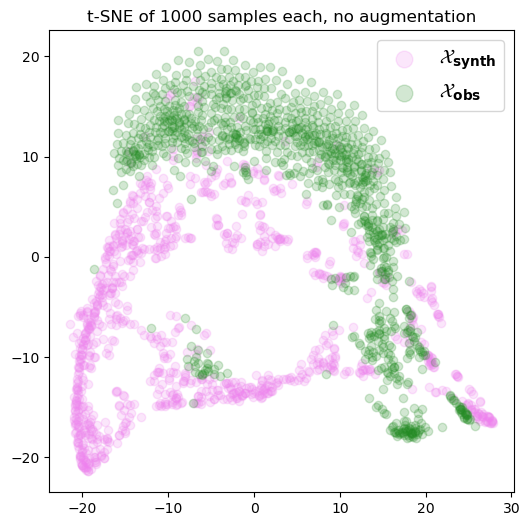

Elapsed time: 8.50 seconds for 1000 samples each


In [27]:
# Perform t-SNE on a subsample of the spectra
start_time = time.time()

tx_synth, ty_synth, tx_obs, ty_obs = run_tsne(spectra_synth_sample, 
                                              spectra_obs_sample, 
                                              perplex=80)

# Plot them together
plt.figure(figsize=(6,6))
plt.scatter(tx_synth, ty_synth,
            label=r'$\mathbf{\mathcal{X}_{synth}}$',
            marker='o', c=syn_color, alpha=0.2)
plt.scatter(tx_obs, ty_obs,
            label=r'$\mathbf{\mathcal{X}_{obs}}$',
            marker='o', c=obs_color, alpha=0.2)
plt.legend(fontsize=14, frameon=True, fancybox=True, markerscale=2.)
plt.title(f't-SNE of {num_samples} samples each, no augmentation')
plt.show()

print(f'Elapsed time: {time.time() - start_time:.2f} seconds for {num_samples} samples each')
#Elapsed time: 57.56 seconds for 5000 each
#Elapsed time: 8.78 seconds for 1000 samples each

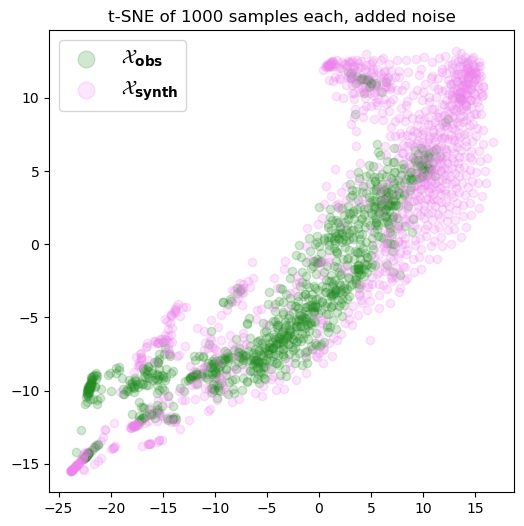

Elapsed time: 9.34 seconds for 1000 samples each


In [28]:
# Perform t-SNE on a subsample of the spectra with gaussian noise
start_time = time.time()

tx_synth, ty_synth, tx_obs, ty_obs = run_tsne(spectra_synth_sample_NOISED, 
                                              spectra_obs_sample, 
                                              perplex=80)

# Plot them together
plt.figure(figsize=(6,6))
plt.scatter(tx_obs, ty_obs,
            label=r'$\mathbf{\mathcal{X}_{obs}}$',
            marker='o', c=obs_color, alpha=0.2)
plt.scatter(tx_synth, ty_synth,
            label=r'$\mathbf{\mathcal{X}_{synth}}$',
            marker='o', c=syn_color, alpha=0.2)
plt.legend(fontsize=14, frameon=True, fancybox=True, markerscale=2.)
plt.title(f't-SNE of {num_samples} samples each, added noise')
plt.show()

print(f'Elapsed time: {time.time() - start_time:.2f} seconds for {num_samples} samples each')

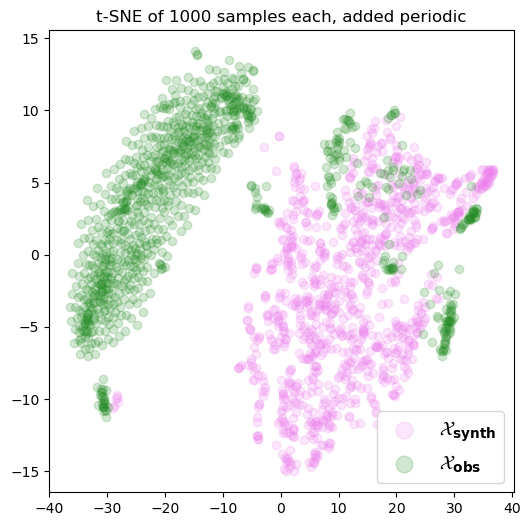

Elapsed time: 8.93 seconds for 1000 samples each


In [29]:
# Perform t-SNE on a subsample of the spectra with periodic offset
start_time = time.time()

tx_synth, ty_synth, tx_obs, ty_obs = run_tsne(spectra_synth_sample_PERIODIC, 
                                              spectra_obs_sample, 
                                              perplex=80)

# Plot them together
plt.figure(figsize=(6,6))
plt.scatter(tx_synth, ty_synth,
            label=r'$\mathbf{\mathcal{X}_{synth}}$',
            marker='o', c=syn_color, alpha=0.2)
plt.scatter(tx_obs, ty_obs,
            label=r'$\mathbf{\mathcal{X}_{obs}}$',
            marker='o', c=obs_color, alpha=0.2)
plt.legend(fontsize=14, frameon=True, fancybox=True, markerscale=2.)
plt.title(f't-SNE of {num_samples} samples each, added periodic')
plt.show()

print(f'Elapsed time: {time.time() - start_time:.2f} seconds for {num_samples} samples each')

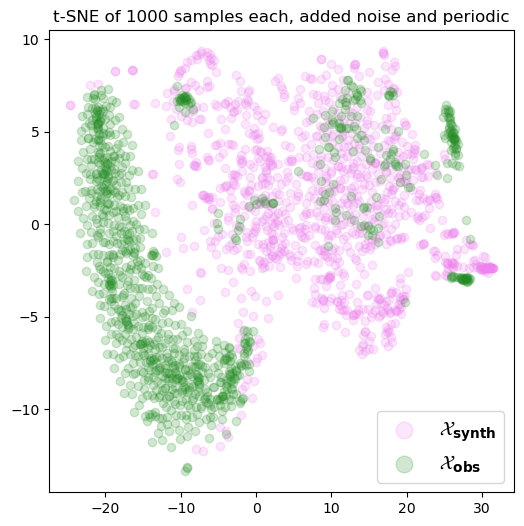

Elapsed time: 9.44 seconds for 1000 samples each


In [30]:
# Perform t-SNE on a subsample of the spectra with gaussian noise and periodic offset
start_time = time.time()

tx_synth, ty_synth, tx_obs, ty_obs = run_tsne(spectra_synth_sample_BOTH, 
                                              spectra_obs_sample, 
                                              perplex=80)

# Plot them together
plt.figure(figsize=(6,6))
plt.scatter(tx_synth, ty_synth,
            label=r'$\mathbf{\mathcal{X}_{synth}}$',
            marker='o', c=syn_color, alpha=0.2)
plt.scatter(tx_obs, ty_obs,
            label=r'$\mathbf{\mathcal{X}_{obs}}$',
            marker='o', c=obs_color, alpha=0.2)
plt.legend(fontsize=14, frameon=True, fancybox=True, markerscale=2.)
plt.title(f't-SNE of {num_samples} samples each, added noise and periodic')
plt.show()

print(f'Elapsed time: {time.time() - start_time:.2f} seconds for {num_samples} samples each')

Adding noise helped, adding sinusoidal really didn't seem to help. However, this is probably because I am adding some sinusoidal noise to everything, when only about 15% of observed spectra have this behavior. For one thing, I shouldn't add the noise to all synthetics. Additionally, I may only want to add it to synthetic samples past a certain temperature threshold, as that was a theory for what was causing that noise.

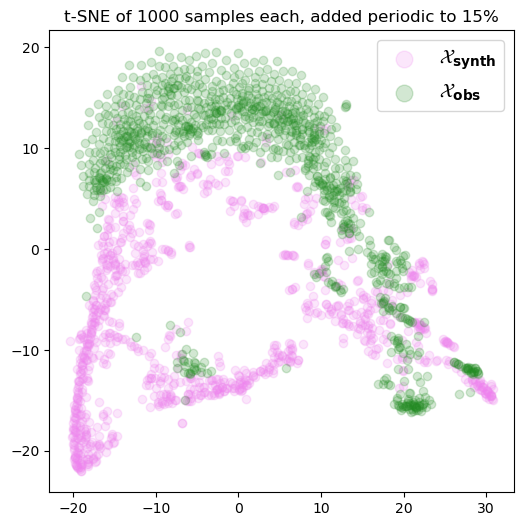

Elapsed time: 8.18 seconds for 1000 samples each


In [31]:
# Only add sinusoidal to a random 15% of the samples
percent = 15
spectra_synth_sample_PERIODIC_15 = add_sinusoidal_modifications(spectra_synth_sample, prob=percent/100.0)

start_time = time.time()

tx_synth, ty_synth, tx_obs, ty_obs = run_tsne(spectra_synth_sample_PERIODIC_15, 
                                              spectra_obs_sample, 
                                              perplex=80)

# Plot them together
plt.figure(figsize=(6,6))
plt.scatter(tx_synth, ty_synth,
            label=r'$\mathbf{\mathcal{X}_{synth}}$',
            marker='o', c=syn_color, alpha=0.2)
plt.scatter(tx_obs, ty_obs,
            label=r'$\mathbf{\mathcal{X}_{obs}}$',
            marker='o', c=obs_color, alpha=0.2)
plt.legend(fontsize=14, frameon=True, fancybox=True, markerscale=2.)
plt.title(f't-SNE of {num_samples} samples each, added periodic to {percent}%')
plt.show()

print(f'Elapsed time: {time.time() - start_time:.2f} seconds for {num_samples} samples each')

17.2% of Synthetic spectra were above the 7000K threshold and received a periodic offset


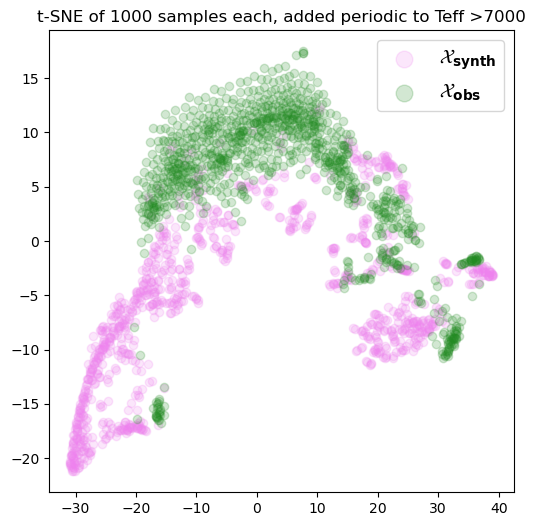

Elapsed time: 8.60 seconds for 1000 samples each


In [32]:
# Only add sinusoidal to high temperature samples
Teff_thresh = 7000
title = f't-SNE of {num_samples} samples each, added periodic to Teff >{Teff_thresh}'

spectra_synth_sample_HOT = np.zeros((len(spectra_synth_sample), len(wave_grid)))

# go through each one, if it's Teff is high enough replace it with the periodic one generated earlier
swap_count = 0
for indx in range(len(spectra_synth_sample_HOT)):
    if teff_samples[indx] >= Teff_thresh:
        spectra_synth_sample_HOT[indx] = spectra_synth_sample_PERIODIC[indx]
        swap_count += 1
    else:
        spectra_synth_sample_HOT[indx] = spectra_synth_sample[indx]

print(f'{100*swap_count/len(spectra_synth_sample_HOT)}% of Synthetic spectra were above the {Teff_thresh}K threshold and received a periodic offset')

start_time = time.time()

tx_synth, ty_synth, tx_obs, ty_obs = run_tsne(spectra_synth_sample_HOT, 
                                              spectra_obs_sample, 
                                              perplex=80)

# Plot them together
plt.figure(figsize=(6,6))
plt.scatter(tx_synth, ty_synth,
            label=r'$\mathbf{\mathcal{X}_{synth}}$',
            marker='o', c=syn_color, alpha=0.2)
plt.scatter(tx_obs, ty_obs,
            label=r'$\mathbf{\mathcal{X}_{obs}}$',
            marker='o', c=obs_color, alpha=0.2)
plt.legend(fontsize=14, frameon=True, fancybox=True, markerscale=2.)
plt.title(title)
plt.show()

print(f'Elapsed time: {time.time() - start_time:.2f} seconds for {num_samples} samples each')